<a href="https://colab.research.google.com/github/VascoBartolo/ML_project/blob/main/1_3_steps_on_CRISP_DM_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Some libraries and dependecies needed

In [2]:
!pip install auto-sklearn
!pip install imblearn
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 260 kB 39.8 MB/s 
     |████████████████████████████████| 4.9 MB 31.5 MB/s 
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
     |████████████████████████████████| 4.4 MB 39.8 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=d2be5f40d5dea62ae1ed1aef4a6067e78b7d070e2cbb0b11b39fe1a331f7f6bb
  Stored in directory: /root/.cache/pip/wheels/c5/11/0e/aeac2cee929fa4388e528737b49deb2eea05486e6f80d61c1a
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=5e3e1e096d9848a9fa3519d3d114350328ffe5acaca748a26afcfaac80f146ac
  Sto

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Introduction

 <img src='https://paginas.fe.up.pt/~lfc-scc/imgs/Logo%20novo%20FEUPbranco.jpg'>

> Universidade do Porto

Master Degree in Engineering and Data Science

> Course: Introdução à Aprendizagem Computacional e Extração de Conhecimento

Project developed by Diogo Cruz and Vasco Bartolomeu

Porto, 5 December 2022

> **Regression task: Predictive algorithm for house pricing**

#1-Project understanding –  What is the main goal of the project?

This project was developed within the scope of the course of Introduction to Computational Learning and Knowledge Extraction. Our aim with this project is to apply the knowledge acquired as part of this course. We developed a data mining project using CRISP-DM methodology:

*   1-Business understanding – What does the business need?
*   2-Data understanding – What data do we have / need? Is it clean?
*   3-Data preparation – How do we organize the data for modeling?
*   4-Modeling – What modeling techniques should we apply?
*   5-Evaluation – Which model best meets the business objectives?
*   6-Deployment – How do stakeholders access the results?

We pretend to use a few preprocessing methods and learning algorithms and also understand and explain some model evaluation methodologies.

The main goal of this project is to build a predictive model that can predict house prices and understand which predictive attributes have more impact on house prices. For this predictive task we need to understand the most relavant attributes that influence the house price. In this Regression task we have built a predictive model from the labeled (train) instances in the data, which maps a vector of predictive attribute values to labels.


#2-Data understanding – What data do we have / need? Is it clean?

Collect Data

The dataset was collected on kaggle. Our dataset has 1460 instances and 32 attributes.

We can find a short resume about dataset in this link: https://docs.google.com/document/d/1XQxu0w4KUVzgF5hsCQLCh3XQwuSNikeu_CcTAtcbFs4/edit

In [72]:
data = pd.read_csv("/content/drive/MyDrive/Feup/ACEC/Project/House-Price-Prediction-clean.csv")

In [73]:
data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


#Describe data

In [11]:
#size of dataset
print("Shape of dataset ",data.shape)
print("Number of intances: ",data.shape[0])
print("Number of Attributes: ",data.shape[1])

Shape of dataset  (1460, 32)
Number of intances:  1460
Number of Attributes:  1460


In [12]:
#Attributes available on dataset
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
#Analysis of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [14]:
#checking Missing data
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [15]:
#some Location statistics
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Explore data

Analysis of target variable

In [16]:
#Location statistics of target variable - Sale Price
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


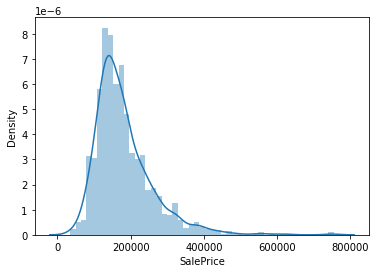

In [17]:
# normality check for the target
ax = sns.distplot(data['SalePrice'])
plt.show()

In [18]:
from scipy import stats
from scipy.stats import norm
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


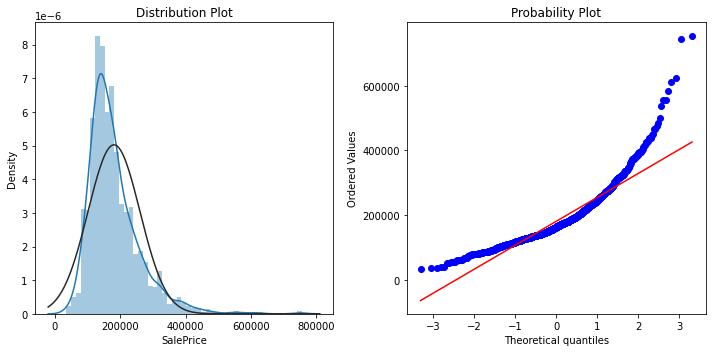

In [19]:
normality_plot(data['SalePrice'])

In [20]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


After looking the distribution of the target variable: 
*   It deviate from the normal distribution
*   Have appreciable positive skewness
*   Show peakedness


Here we see that the SalePrice variable is slightly right skewed but prior to applying directly a log transform on this variable we are going to check for correlation between all the variables and see if there is any problematic levels of multicollinearity.

(As this is a regression task, we want the target to be normally distributed.)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


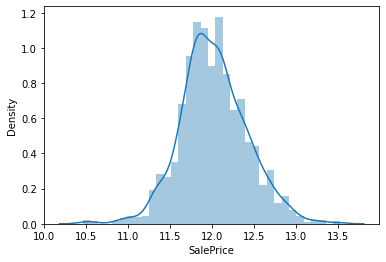

In [21]:
#One of the methods to normalize right-skewed data is using log transformation because big values will be pulled to the center. However, log(0) is Nan, so I will use log(1+X) to fix skewness instead.
#y = np.log(1 + y)

# log-transform the dependent variable for normality
y_train = np.log(data['SalePrice'])

ax = sns.distplot(y_train)
plt.show()

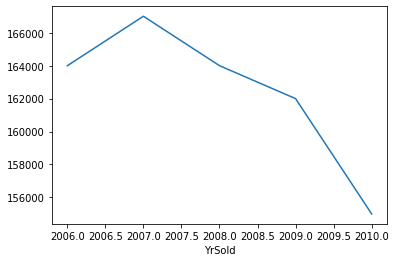

In [22]:
data.groupby('YrSold')['SalePrice'].median().plot()

In [82]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

The median price of houses sold has been declining since 2007

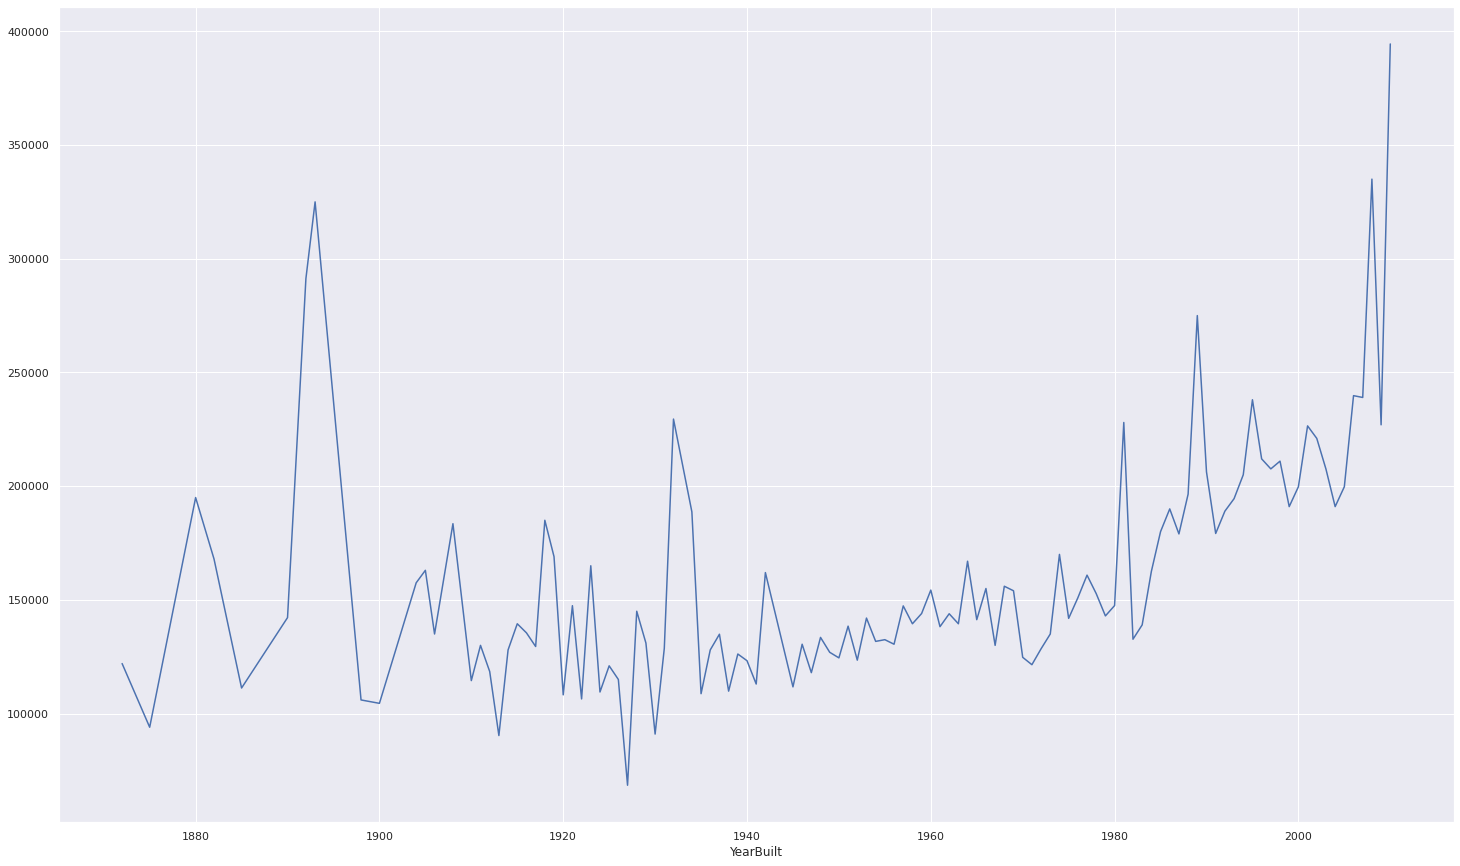

In [83]:
data.groupby('YearBuilt')['SalePrice'].median().plot()

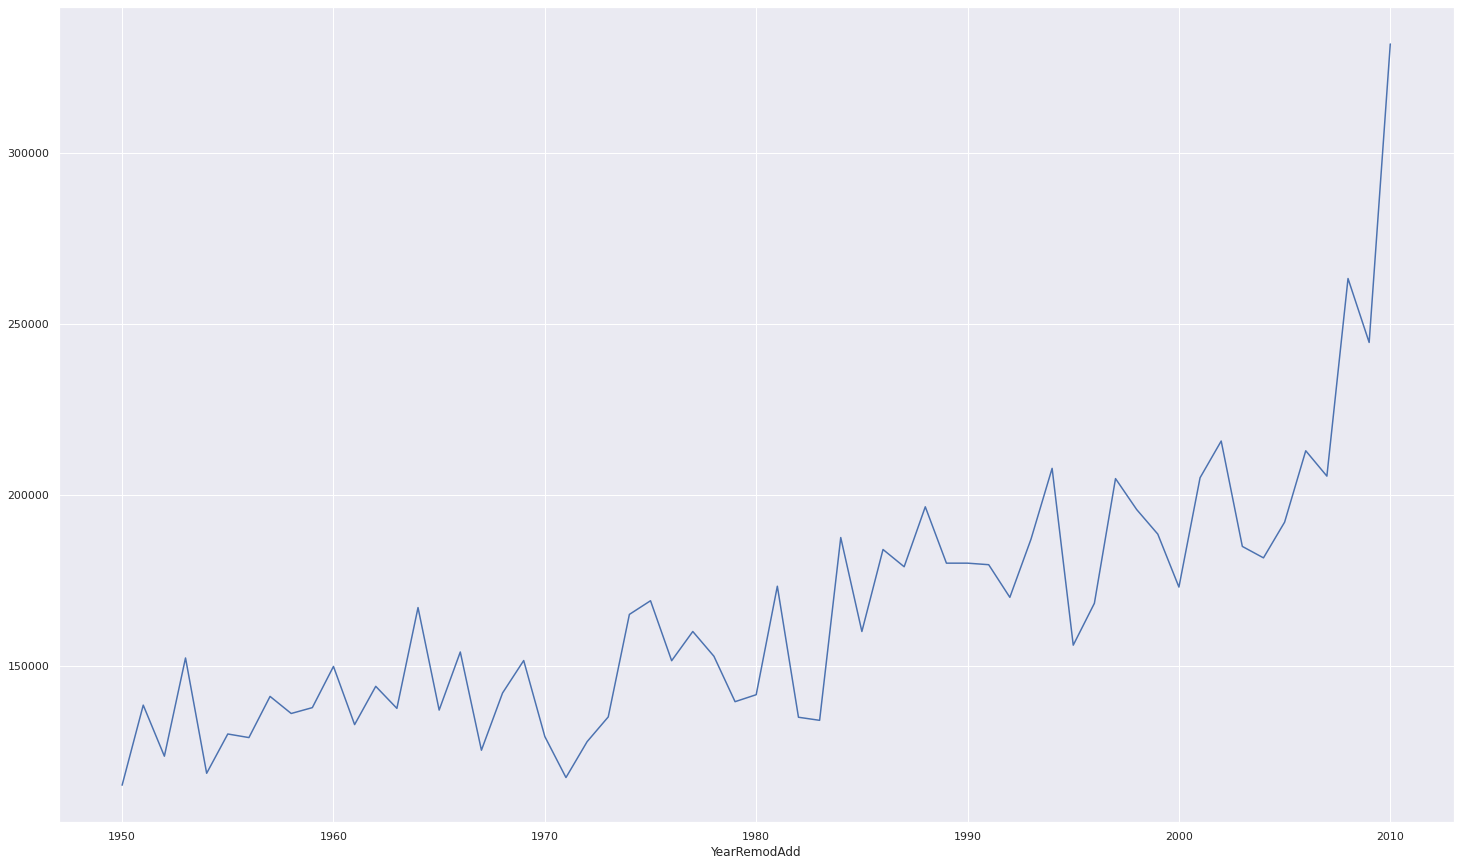

In [84]:
data.groupby('YearRemodAdd')['SalePrice'].median().plot()

Relationship with numerical variables

(correct here because we may not log transform skewned variables)

In the next step I will examine skewness in the rest of numerical variables and use log transformation to fix them,

Fixing skewness in other numerical variables

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Below are skewed features in our original train data

In [23]:
#Analysis of skewness in the rest of numerical variables
skewness = data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
KitchenAbvGr      4.488397
ScreenPorch       4.122214
EnclosedPorch     3.089872
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


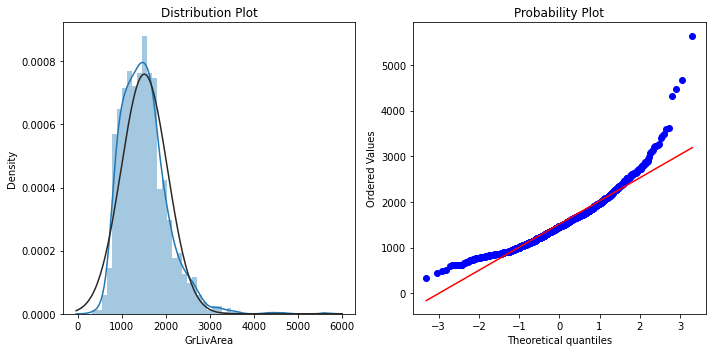

In [24]:
normality_plot(data['GrLivArea'])

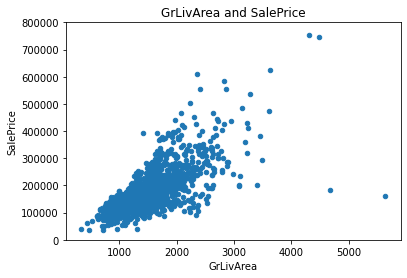

In [25]:
#scatter plot grlivarea/saleprice
data_aux = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
data_aux.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), title='GrLivArea and SalePrice');
#It seems that 'SalePrice' and 'GrLivArea' have a linear relationship.

may should remove that two outliers

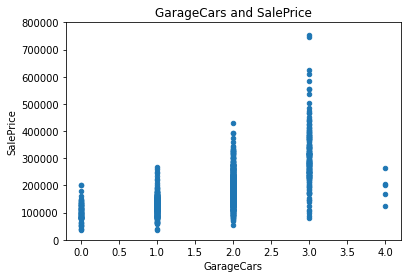

In [26]:
#scatter plot grlivarea/saleprice
data_aux = pd.concat([data['SalePrice'], data['GarageCars']], axis=1)
data_aux.plot.scatter(x='GarageCars', y='SalePrice', ylim=(0,800000), title='GarageCars and SalePrice');

In [27]:
quality_pivot = data.pivot_table(index='GarageCars',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


In [28]:
print ("Count Houses sold: \n")
print (data.GarageCars.value_counts(), "\n")

Count Houses sold: 

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64 



5 houses sold with capacity for 4 cars eitherway the Median price on houses with a garage with capacity for 3 cars is bigger than 4 cars.

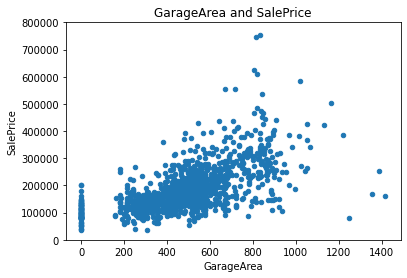

In [29]:
data_aux = pd.concat([data['SalePrice'], data['GarageArea']], axis=1)
data_aux.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000), title='GarageArea and SalePrice');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb791c02f40>,
      dtype=object)

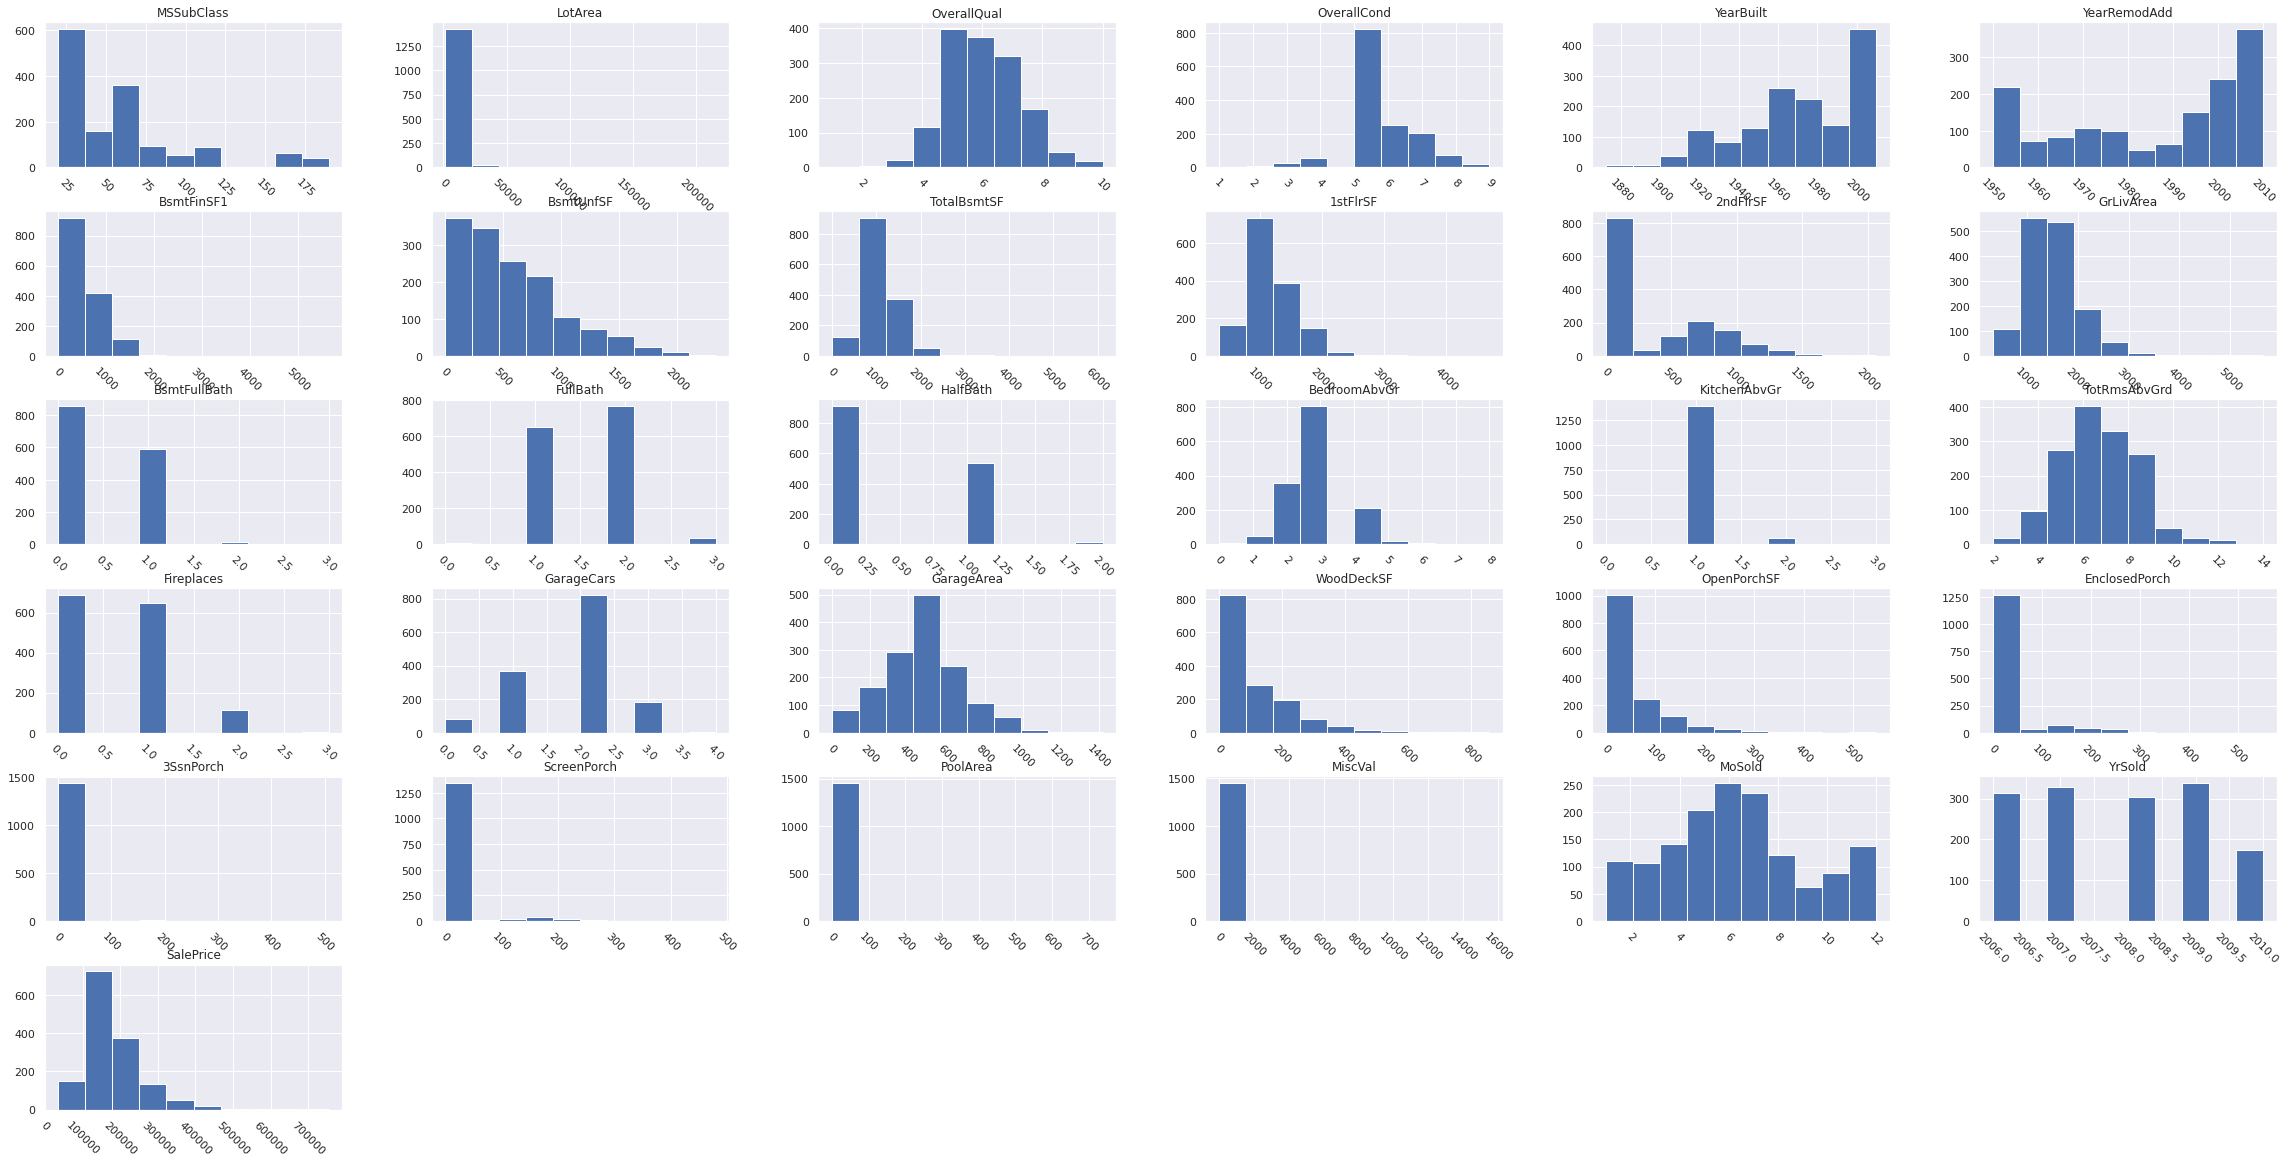

In [74]:
data.dtypes[data.dtypes!='object']
data.loc[:, data.columns != 'Id'].hist(figsize=(40,20), xrot=-45)

Relationship with categorical features

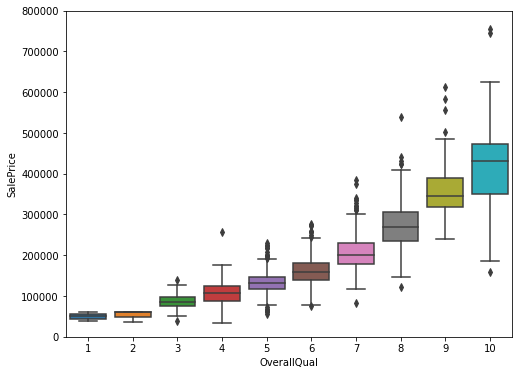

In [31]:
#box plot overallqual/saleprice
data_aux2 = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data_aux2)
fig.axis(ymin=0, ymax=800000);

In [32]:
quality_pivot = data.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


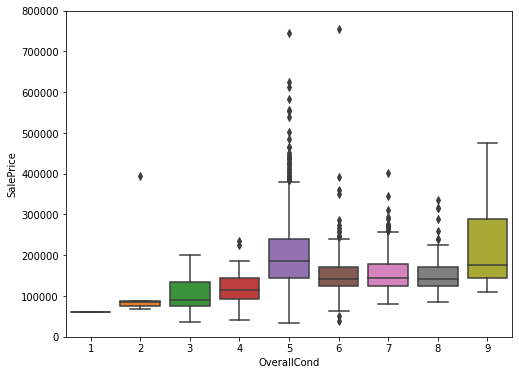

In [33]:
#box plot OverallCond/saleprice
data_aux4 = pd.concat([data['SalePrice'], data['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallCond", y="SalePrice", data=data_aux4)
fig.axis(ymin=0, ymax=800000);

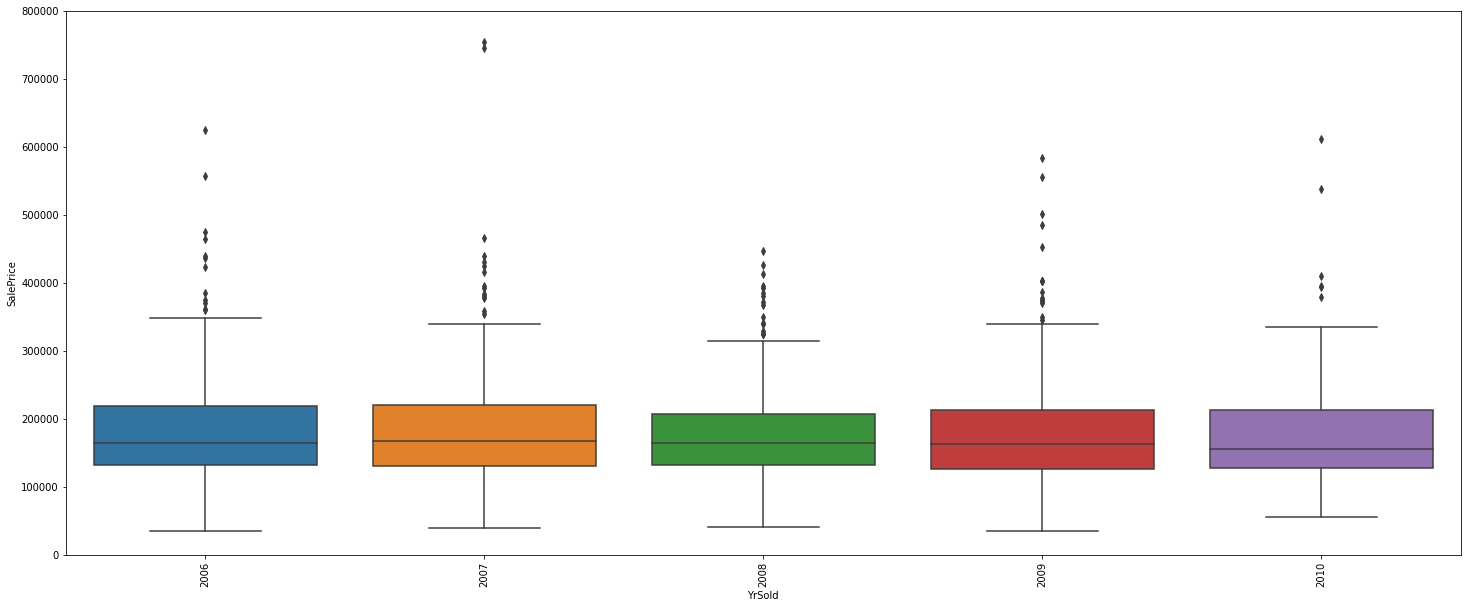

In [41]:
data_aux6 = pd.concat([data['SalePrice'], data['YrSold']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x="YrSold", y="SalePrice", data=data_aux6)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

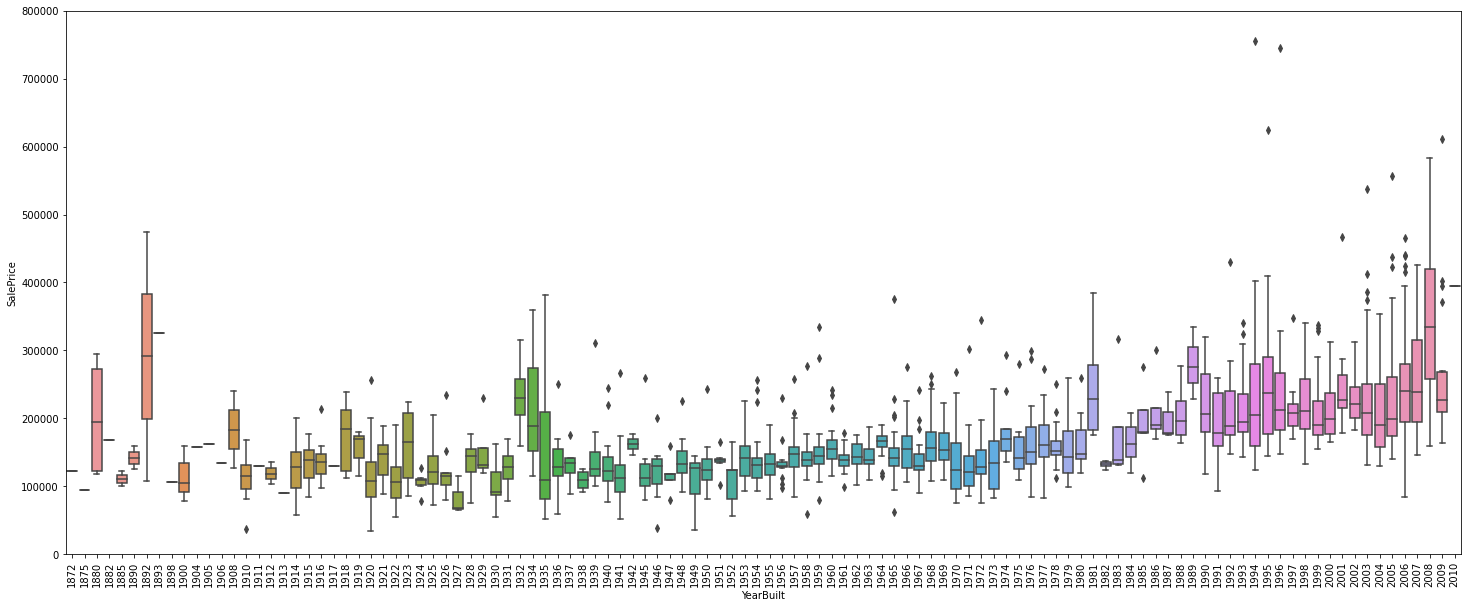

In [34]:
data_aux3 = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data_aux3)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


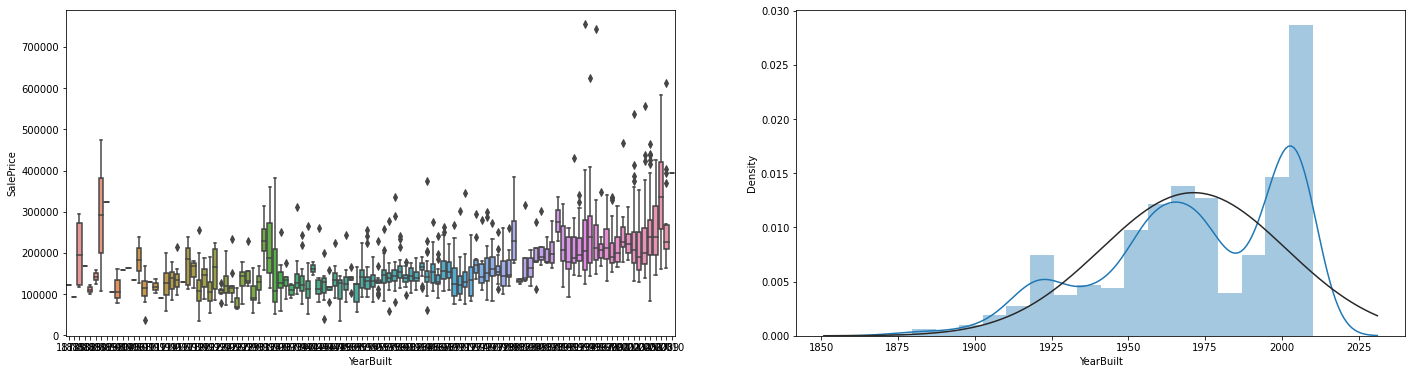

In [35]:
fig, axs = plt.subplots(1,2,figsize=(24,6))
ax1 = sns.boxplot(x="YearBuilt", y="SalePrice", data=data, ax=axs[0])
ax = sns.distplot(data['YearBuilt'], ax=axs[1],fit=norm);
plt.close(2)

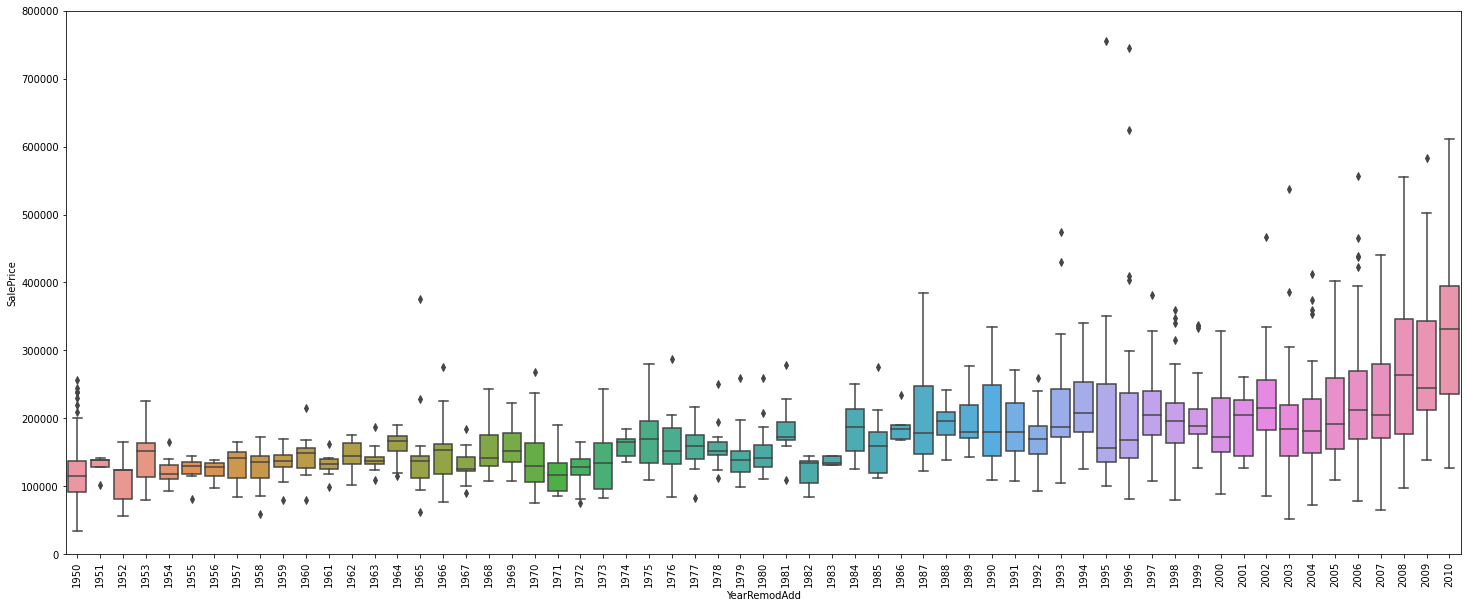

In [36]:
data_aux5 = pd.concat([data['SalePrice'], data['YearRemodAdd']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=data_aux5)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Text(0, 0.5, 'Sum of sales')

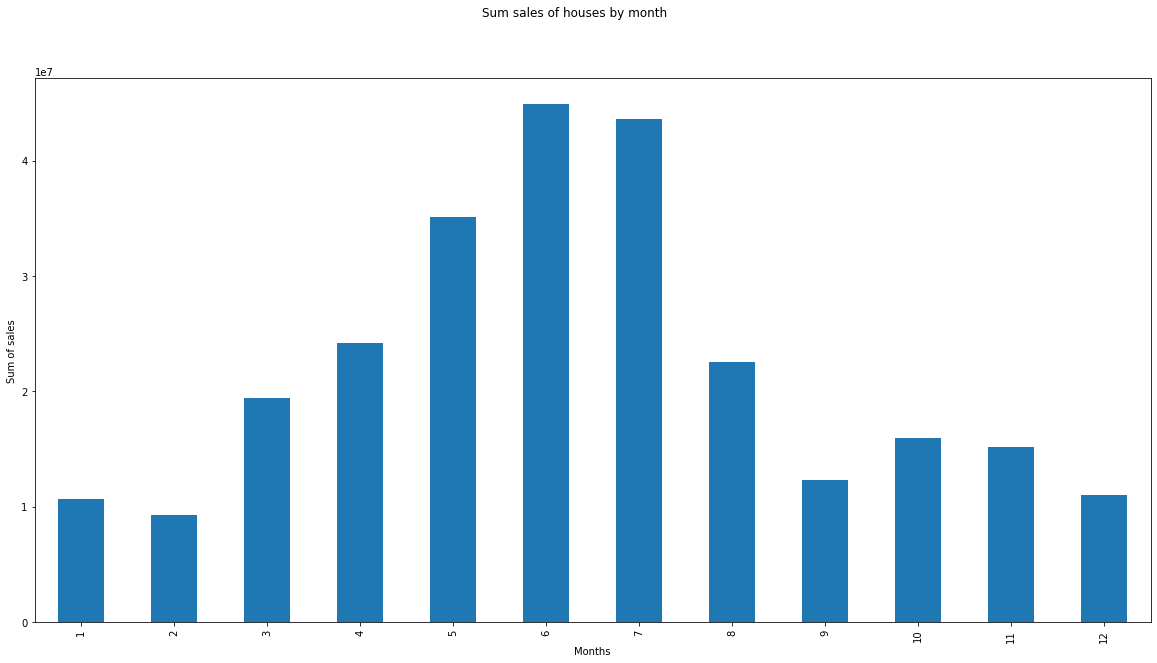

In [37]:
#Junho e Julho foram os meses em que o valor das vendas foi maior
k = data.groupby(['MoSold']).sum()['SalePrice']
plt.rcParams['figure.figsize'] = [20, 10]
k.plot.bar()
# Add title and axis names
plt.suptitle('Sum sales of houses by month')
#plt.title('Sum sales of houses by month')
plt.xlabel('Months')
plt.ylabel('Sum of sales')

#Correlation Matrix

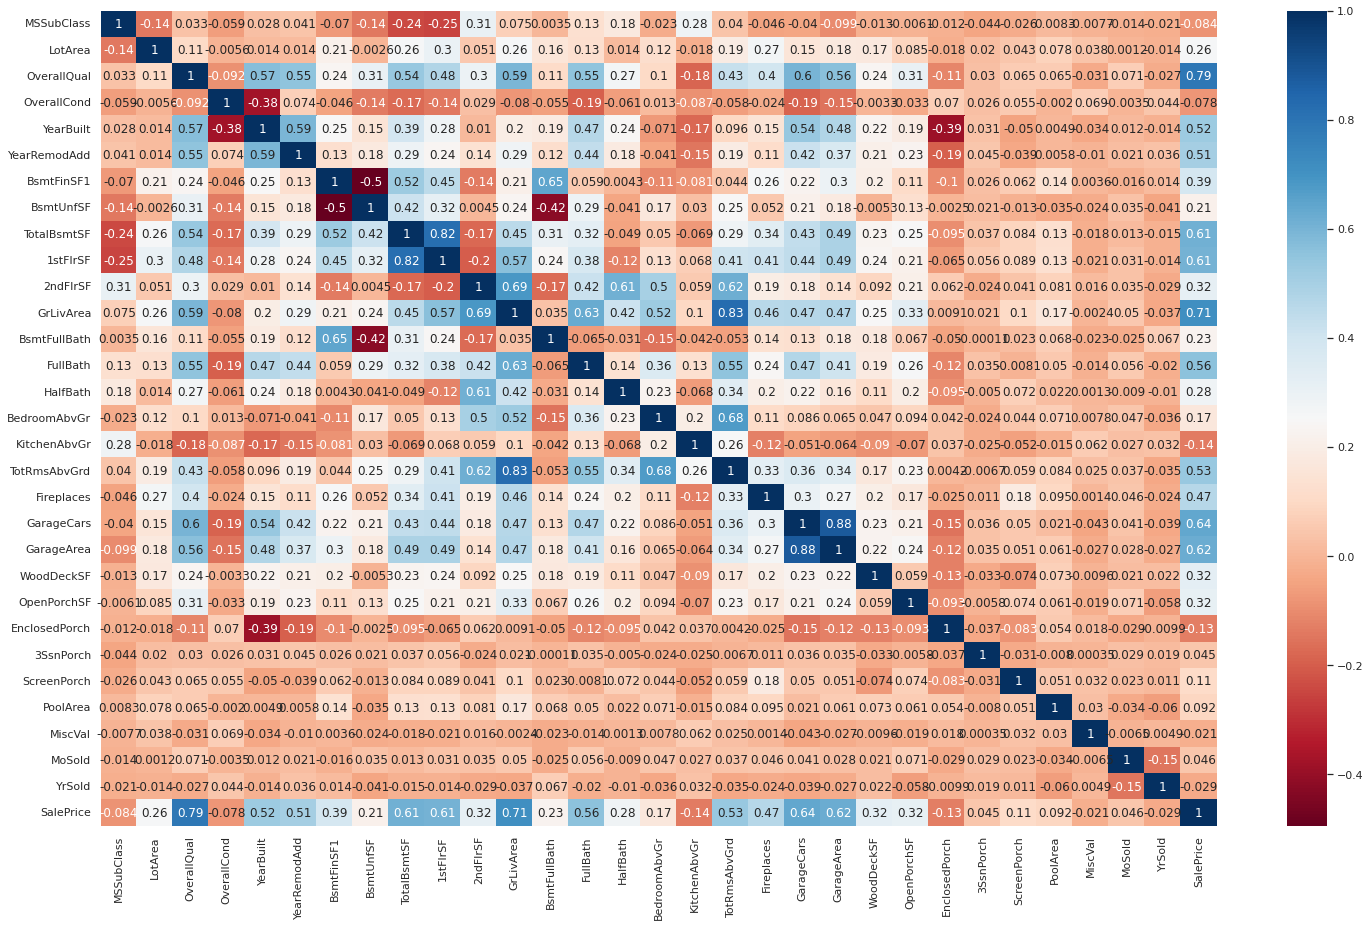

In [75]:
cor=data.loc[:, data.columns != 'Id'].corr()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(cor, annot=True,cmap='RdBu');

Highest correlations with the target variable are Ground Living Area and Overall quality of the house, going around the 70% correlation mark. We were worried that these high correlation values would bias the prediction capabilities of the model but after applying a log transform to the SalePrice variable these correlation values decreased and the accuracy of the model decrease with it. This happened because we removed core relationships with our target variable those would weight a lot in the inference of our SalePrice.

In [43]:
# we compute correlation coeffs of all variables with SalePrice and then sort by decreasing order.
top20_sales = abs(data.corr()["SalePrice"].sort_values(ascending = False)).head(21)
top20_sales = pd.DataFrame(top20_sales)
top20_sales.rename(columns={"SalePrice": "Correlation coeff with SalePrice"})
top20_sales = top20_sales.iloc[1:]
top20_sales

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Regarding price the variables with higher correlation are OverallQual, GrLivArea, GarageCars and GarageArea.

The `size` parameter has been renamed to `height`; please update your code.


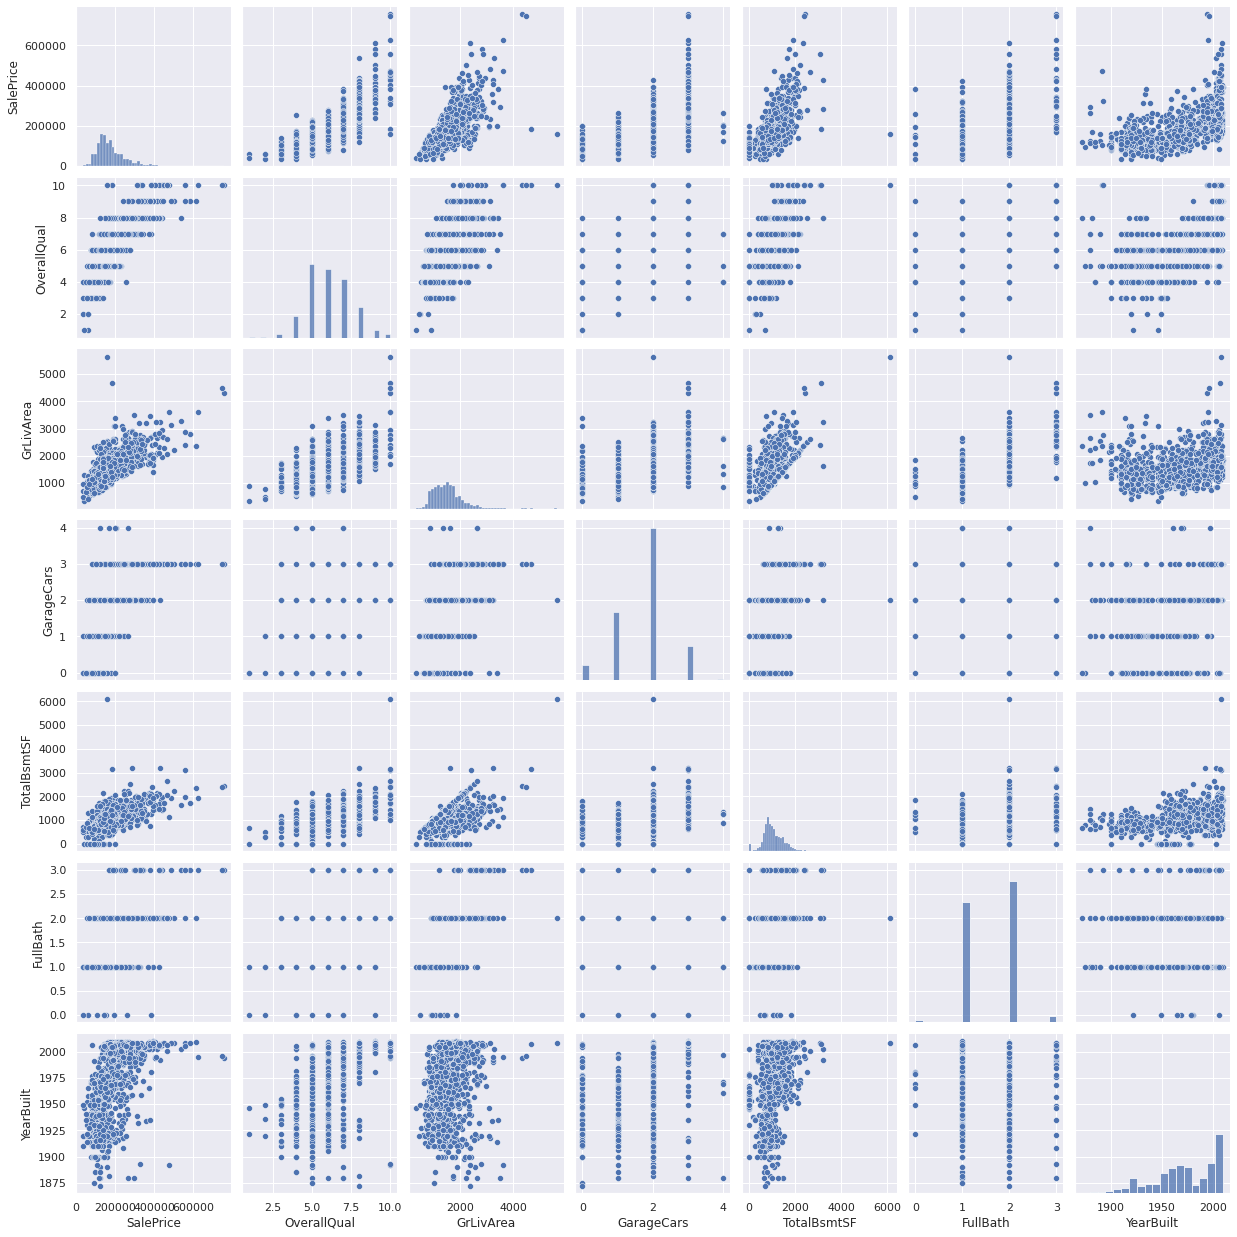

In [44]:
#Scatter plots between 'SalePrice' and correlated variables
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

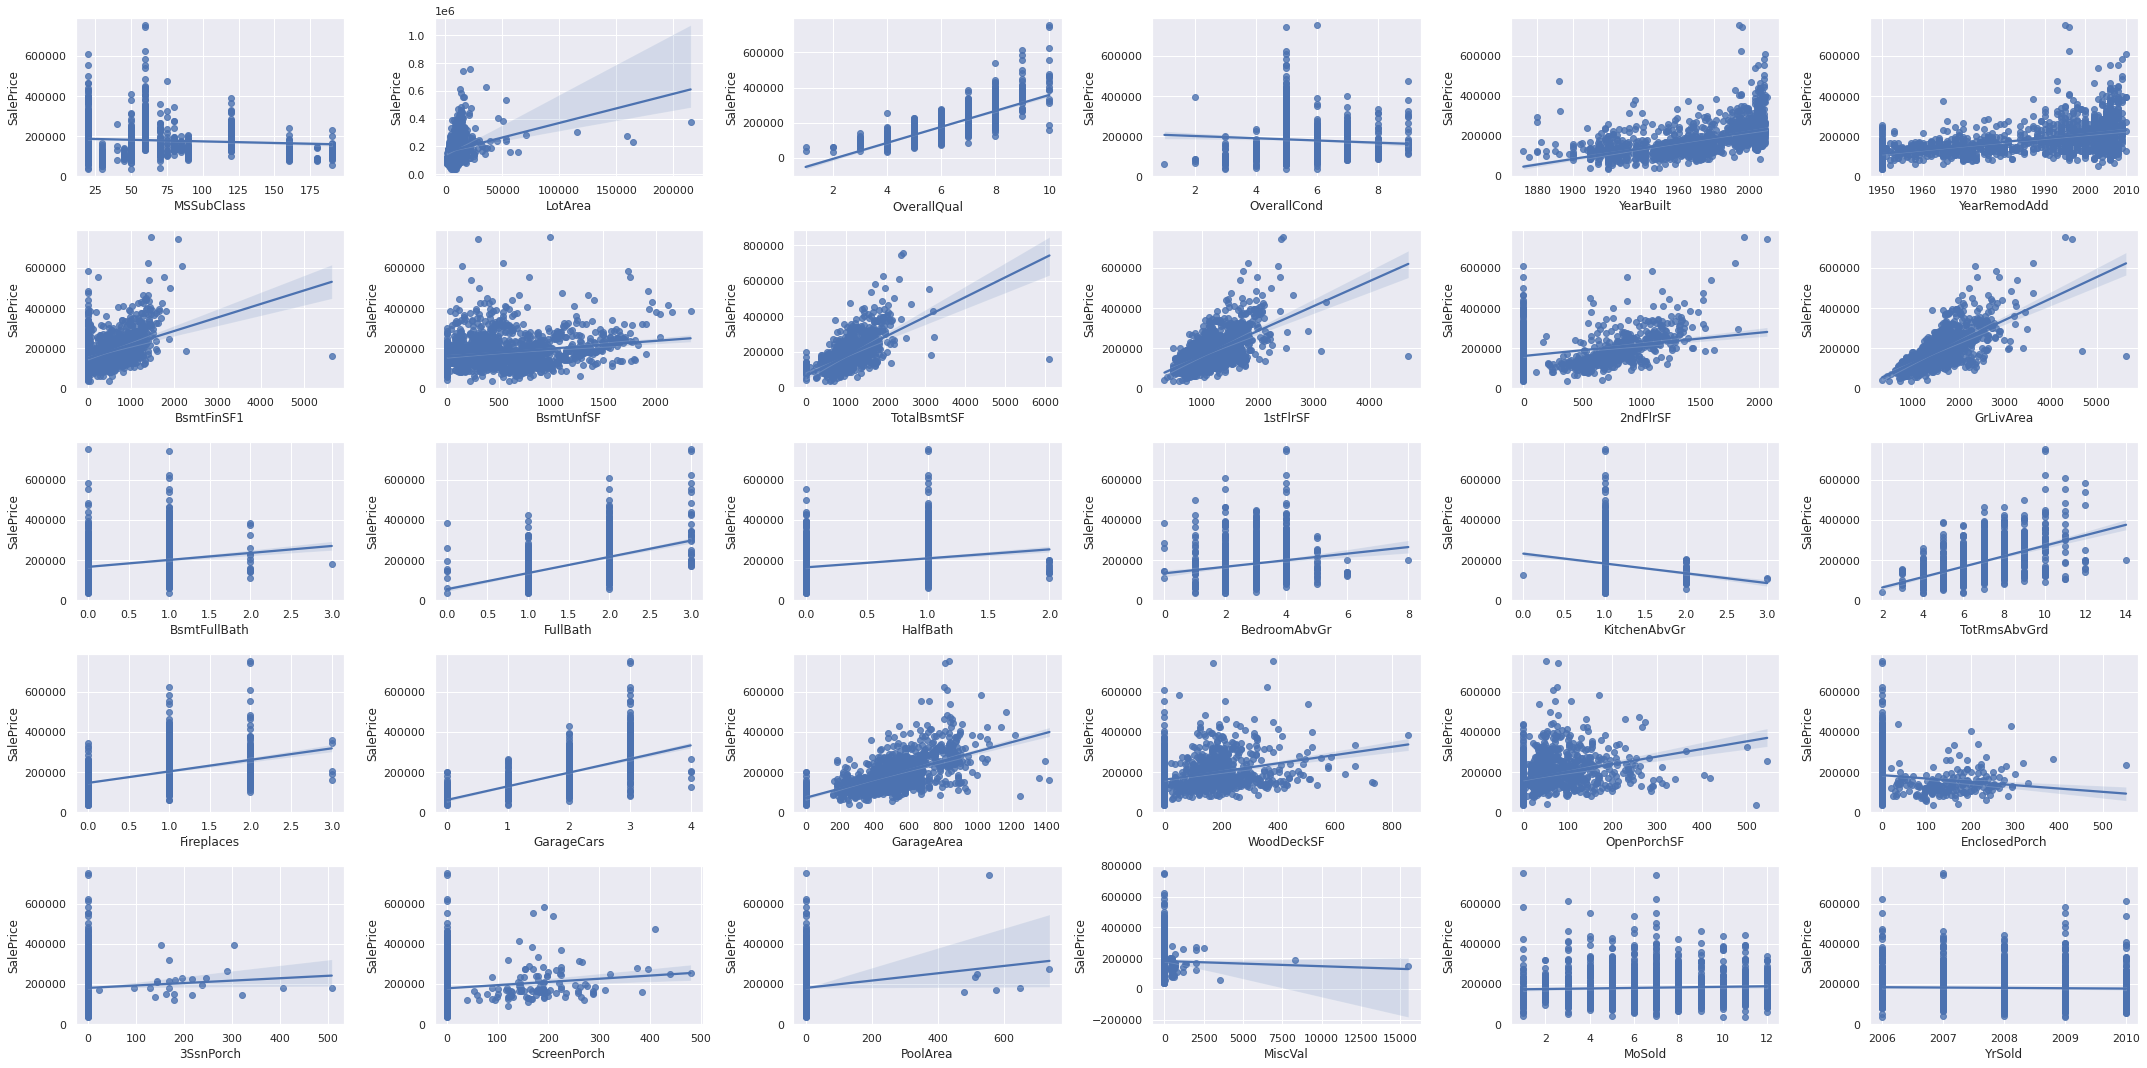

In [81]:
df1 = data.loc[:, data.columns != 'Id']
# relation to the target
fig = plt.figure(figsize=(30,15))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=df1.iloc[:,i], y=df1['SalePrice'])

plt.tight_layout()
plt.show()

#3 - Data preparation – How do we organize the data for modeling?

In the 3rd step of CRISP-DM methodology - Data preparation - We select the data to be used on the model and did an analasys of missing values and outliers to ensure the data is clean and well format to apply the model.

Missing values analysis

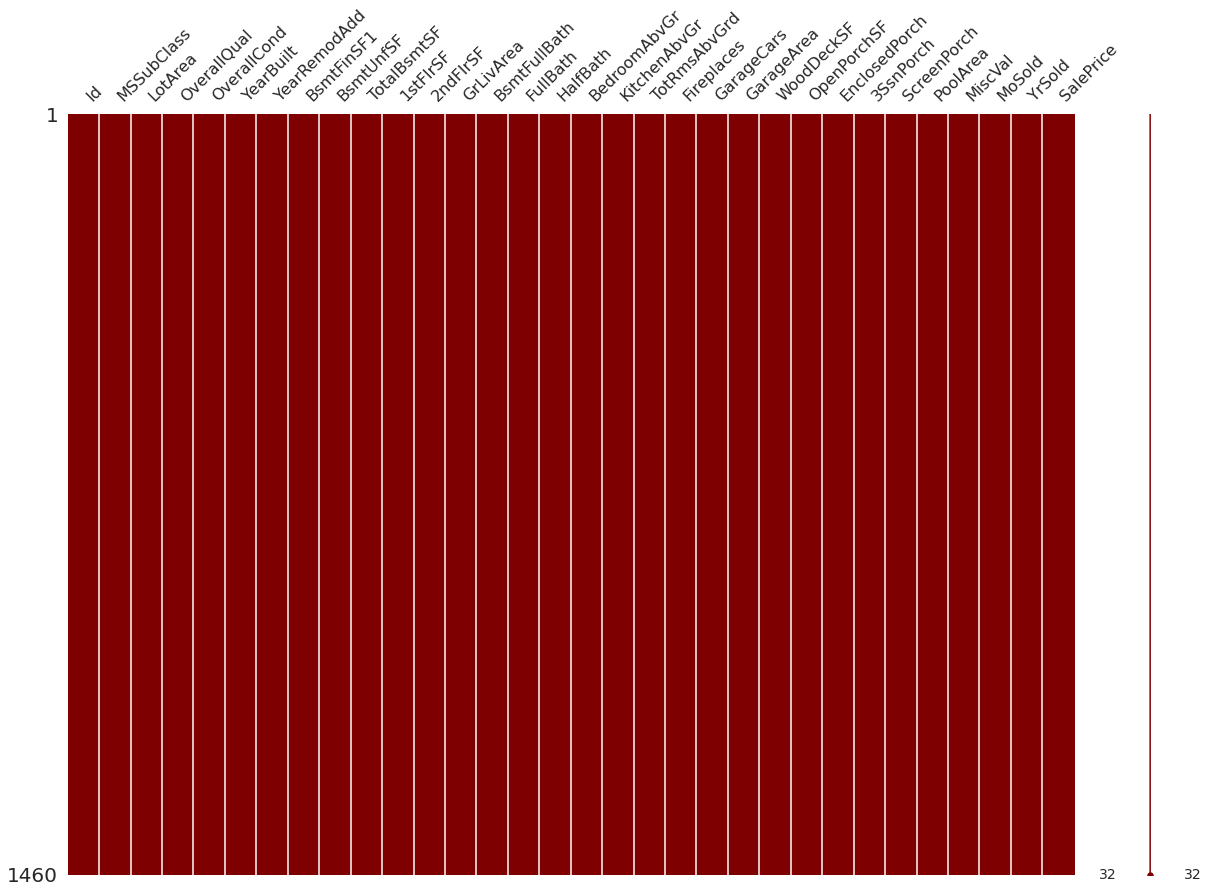

In [46]:
import missingno as msno

msno.matrix(df=data, figsize=(20,14), color=(0.5,0,0))

As we can see from the image above the dataset does not have any missing value to handle. So, will now check the existance of any Ouliers.

Outliers analysis

Outliers is something that we should be aware and treat each case accordingly with context and importance of each attribute because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Duplicated rows

In [52]:
#No duplicated columns
df = data.loc[:, data.columns != 'Id']
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :", duplicate.shape[0])

Duplicate Rows : 0


Since all the variables are in int64 type, so every variables are ready to be used for the regression problem.

#4-Modeling – What modeling techniques should we apply?

In [54]:
#Get one matrix will all attribute variables and one vector with price

x = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']

In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

#Creating a split for train and test sample with 20% for test matrix, this value is low because the number of instances 
# is low so we are trying to maximize the size of our train sample that's why we apply an oversampler on the train matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)


## Defining the algorithms we are going to use

For the algorithms it was chosen some with different approaches to see which one better fits the data. 

First, since this is a regression problem it was picked the standart **Linear regression**. It was expected this algorithm to perform well but not to be the best for the data distribution.

Second, it is going to be used the **KNN regressor**. This algorithm was picked because since the price distribution is right skewed, the house price is condensed within some groups so this cluster algortihm might fit well to the data.

Third, the **DecisionTree regressor**. This type of algorithms is one of the most standart for prediction problems but for regression problems it gets more sensible regarding the decision making process, this effect is not so visible when it's applied in a classification problem. Having this said it is expected that the results overfit to the training set but regarding the test set the results will decrease a lot, to try to improve this we will tune the parameters later to increase its accuracy.

Forth, it was picked an improvement to the regular decision tree algorithm, the **RandomForest regressor**. What this algortihm does it get the average result of different decision trees so it is expected that the final result will be less overfited and more accurate according to reality. These improvements to the decision tree come from some properties of the algorithm like bagging (parallelly run different decision trees and average the result) and bootstrapping (randomly choosing samples from training data).

Last but not least, the **XGBoost regressor**. This algorithm in the other hand has a different property called boosting, what this does is re-defines a numerical optimization problem where the objective is to minimize the loss function of the model by adding weak learners using gradient descent.


Here is a lot of different approaches to this regression problem so now lets see which fits best to the data.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Here we are defining the models and fitting them to the training set with default parameters
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

kn_reg = KNeighborsRegressor(n_neighbors=3)
kn_reg.fit(X_train, y_train)

regr_dt = DecisionTreeRegressor(random_state=1)
regr_dt.fit(X_train, y_train)

rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)

xgb_reg = xgb.XGBRegressor(random_state=1)
xgb_reg.fit(X_train, y_train)

[23:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

## See the results of prediction for the training set

In [58]:
y_pred_train_lr = linear_reg.predict(X_train)
y_pred_train_kn = kn_reg.predict(X_train)
y_pred_train_dt = regr_dt.predict(X_train)
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_train_xgb = xgb_reg.predict(X_train)

## Check performance measures with test data

For this regression task it was picked the most common evaluation measures for regression taks, here it is explaineed what they do: 

- The **Root Mean Squared Error** represents the square root of the quadratic mean of the difference between predicted values and observed values.

- The **Mean Absolute Error** is calculated as the sum of absolute errors between the predicted values and the observed values divided by the sample size.

- The **Mean Absolute Percentage Error** is the previous calculated error in a percentage notation.

- The **Median Absolute Error** is calculated by taking the median of all absolute differences between the target and the prediction. This is particularly interesting because it is robust to outliers.

- The **$R^2$ Score** is the total variance explained by model divided by the total variance. So if it is 100%, the two variables are perfectly correlated, with no variance at all. It is then pursuited a model that has the closest value of $r^2$ closest to $100$ as possible.

In [59]:
from sklearn.metrics import mean_squared_error
#Root mean squared error
rmse_lr=mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_kn=mean_squared_error(y_train, y_pred_train_kn, squared=False)
rmse_dt=mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_rf=mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_xgb=mean_squared_error(y_train, y_pred_train_xgb, squared=False)

from sklearn.metrics import mean_absolute_error
#Mean absolute error
mae_lr=mean_absolute_error(y_train, y_pred_train_lr)
mae_kn=mean_absolute_error(y_train, y_pred_train_kn)
mae_dt=mean_absolute_error(y_train, y_pred_train_dt)
mae_rf=mean_absolute_error(y_train, y_pred_train_rf)
mae_xgb=mean_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import mean_absolute_percentage_error
#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_kn=mean_absolute_percentage_error(y_train, y_pred_train_kn)
mape_dt=mean_absolute_percentage_error(y_train, y_pred_train_dt)
mape_rf=mean_absolute_percentage_error(y_train, y_pred_train_rf)
mape_xgb=mean_absolute_percentage_error(y_train, y_pred_train_xgb)

from sklearn.metrics import median_absolute_error
#Median absolute error
medae_lr=median_absolute_error(y_train, y_pred_train_lr)
medae_kn=median_absolute_error(y_train, y_pred_train_kn)
medae_dt=median_absolute_error(y_train, y_pred_train_dt)
medae_rf=median_absolute_error(y_train, y_pred_train_rf)
medae_xgb=median_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import r2_score
#R² score, the coefficient of determination
r2_lr=r2_score(y_train, y_pred_train_lr)
r2_kn=r2_score(y_train, y_pred_train_kn)
r2_dt=r2_score(y_train, y_pred_train_dt)
r2_rf=r2_score(y_train, y_pred_train_rf)
r2_xgb=r2_score(y_train, y_pred_train_xgb)

# Create a table to display all the metrics for the training sample
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,38041.909829,24120.857696,0.137264,17712.875438,0.839705
KNeighborsRegressor,4473.716458,652.496062,0.004161,0.000000,0.997783
DecisionTreeRegressor,0.000000,0.000000,0.000000,0.000000,1.000000
RandomForestRegressor,1722.209070,235.120520,0.001512,0.000000,0.999671
XGBoost,15653.984821,11427.690185,0.065968,8545.046875,0.972858


Here as expected the decision tree overfitted to the training parameters and has no error, it is expected that in the test sample its accuracy to decrease a lot. 

Regarding the other models, the ones with accuracy above $99.9% $ will most probably need some tuning later on because these values don't seem realistic but the **Linear Regression** and **XGBoost** seem to be well fitted. 

To try and fix this overfitting issue we tried to standartize the data but the coefficient values decrease a lot so it was opted to let the data unstandardized.

#5-Evaluation – Which model best meets the business objectives?

# For the test sample

In [60]:
y_pred_test_lr = linear_reg.predict(X_test)
y_pred_test_kn = kn_reg.predict(X_test)
y_pred_test_dt = regr_dt.predict(X_test)
y_pred_test_rf = rf_reg.predict(X_test)
y_pred_test_xgb = xgb_reg.predict(X_test)

Make predictions for the test sample

In [61]:
#Root mean squared error
rmse_lr=mean_squared_error(y_test, y_pred_test_lr, squared=False)
rmse_kn=mean_squared_error(y_test, y_pred_test_kn, squared=False)
rmse_dt=mean_squared_error(y_test, y_pred_test_dt, squared=False)
rmse_rf=mean_squared_error(y_test, y_pred_test_rf, squared=False)
rmse_xgb=mean_squared_error(y_test, y_pred_test_xgb, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test, y_pred_test_lr)
mae_kn=mean_absolute_error(y_test, y_pred_test_kn)
mae_dt=mean_absolute_error(y_test, y_pred_test_dt)
mae_rf=mean_absolute_error(y_test, y_pred_test_rf)
mae_xgb=mean_absolute_error(y_test, y_pred_test_xgb)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test, y_pred_test_lr)
mape_kn=mean_absolute_percentage_error(y_test, y_pred_test_kn)
mape_dt=mean_absolute_percentage_error(y_test, y_pred_test_dt)
mape_rf=mean_absolute_percentage_error(y_test, y_pred_test_rf)
mape_xgb=mean_absolute_percentage_error(y_test, y_pred_test_xgb)

#Median absolute error
medae_lr=median_absolute_error(y_test, y_pred_test_lr)
medae_kn=median_absolute_error(y_test, y_pred_test_kn)
medae_dt=median_absolute_error(y_test, y_pred_test_dt)
medae_rf=median_absolute_error(y_test, y_pred_test_rf)
medae_xgb=median_absolute_error(y_test, y_pred_test_xgb)

#R² score, the coefficient of determination
r2_lr=r2_score(y_test, y_pred_test_lr)
r2_kn=r2_score(y_test, y_pred_test_kn)
r2_dt=r2_score(y_test, y_pred_test_dt)
r2_rf=r2_score(y_test, y_pred_test_rf)
r2_xgb=r2_score(y_test, y_pred_test_xgb)

# Create a table to display all the metrics for the training sample
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31461.760316,21596.983985,0.139847,16983.119648,0.861210
KNeighborsRegressor,59348.057728,37136.513699,0.217770,24000.000000,0.506139
DecisionTreeRegressor,35557.460523,24863.034247,0.161286,17700.000000,0.822723
RandomForestRegressor,25820.214331,17833.494966,0.116341,12385.900000,0.906521
XGBoost,23437.889946,15206.707821,0.095258,10254.628906,0.922975


Here we can see the values of the decision tree decreased, not as much as expected but the KNN performed really poorly in the test sample, this may have happened because the clusters the algotrithm formed in the test sample were over adjusted to the train sample and they didn't fit the test data.

The random forest and gradient boost performed basically the same, since both algorithms perform random samples the oversample in the train set help the random forest keep up with the bootstrap method of the XGBoost.

# Now we are going to plot the prediction values see what the variance for each algortihm looks like

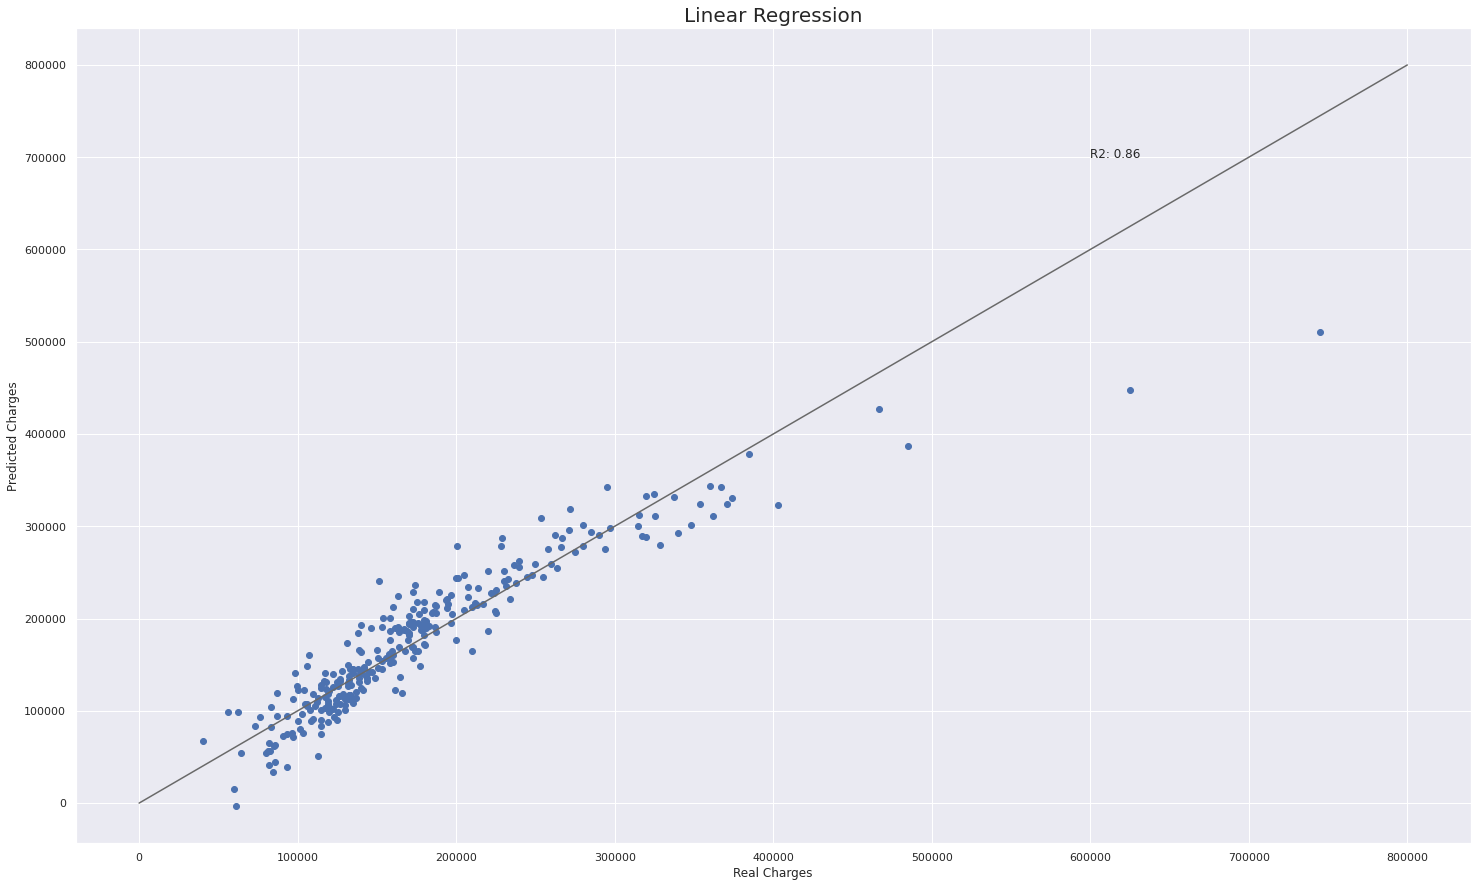

In [62]:
plt.scatter(y_test, y_pred_test_lr)
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [600000, 700000])
plt.title('Linear Regression', fontsize=20)
plt.show()

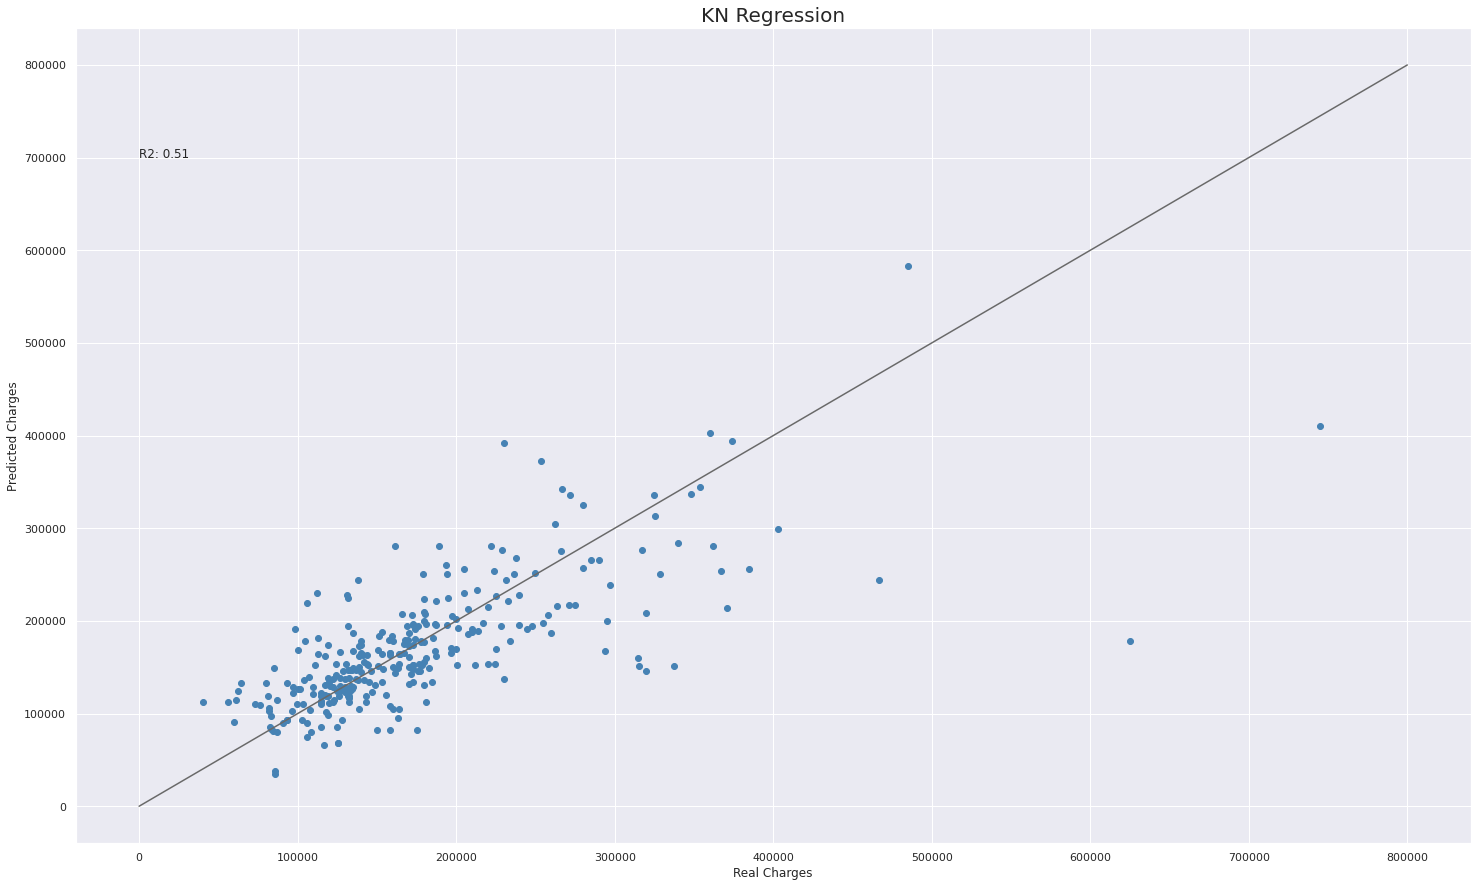

In [63]:
plt.scatter(y_test, y_pred_test_kn, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_kn,2)), [0,600000], [0,700000])
plt.title('KN Regression', fontsize=20)
plt.show()

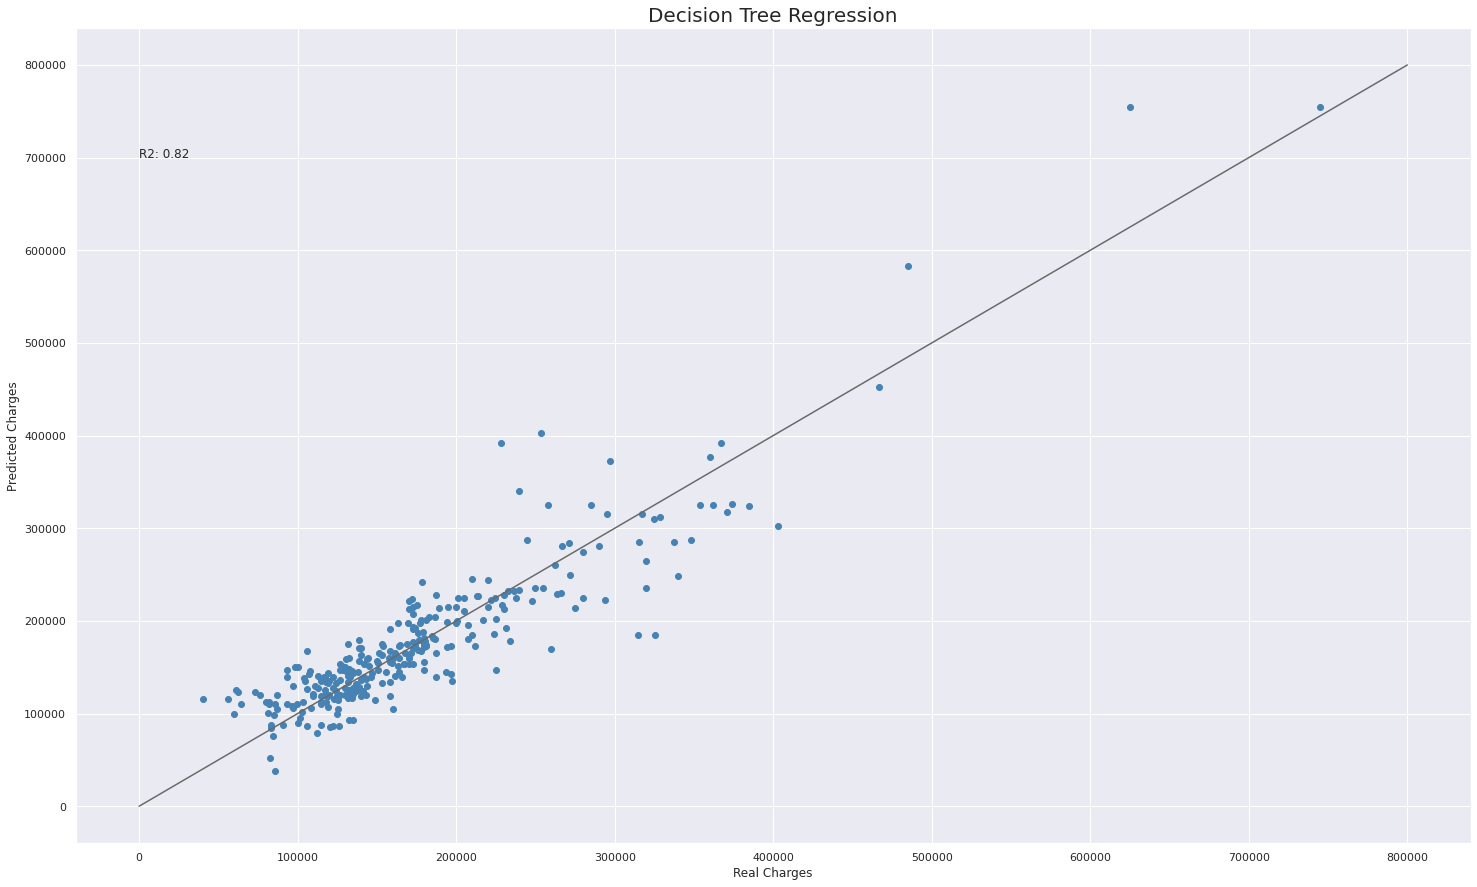

In [64]:
plt.scatter(y_test, y_pred_test_dt, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_dt,2)), [0,600000], [0,700000])
plt.title('Decision Tree Regression', fontsize=20)
plt.show()

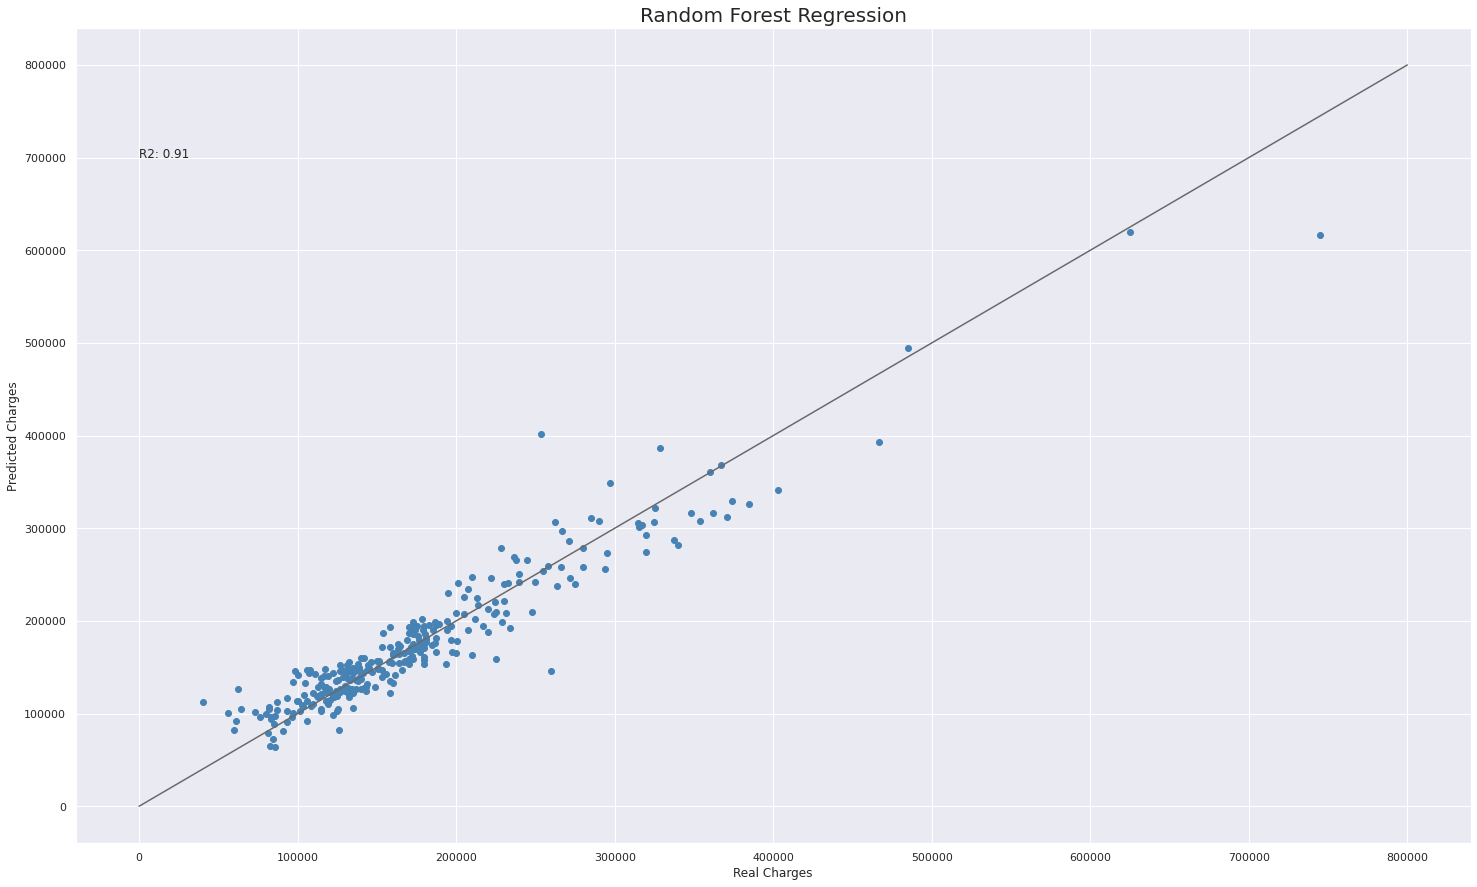

In [65]:
plt.scatter(y_test, y_pred_test_rf, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_rf,2)), [0,600000], [0,700000])
plt.title('Random Forest Regression', fontsize=20)
plt.show()

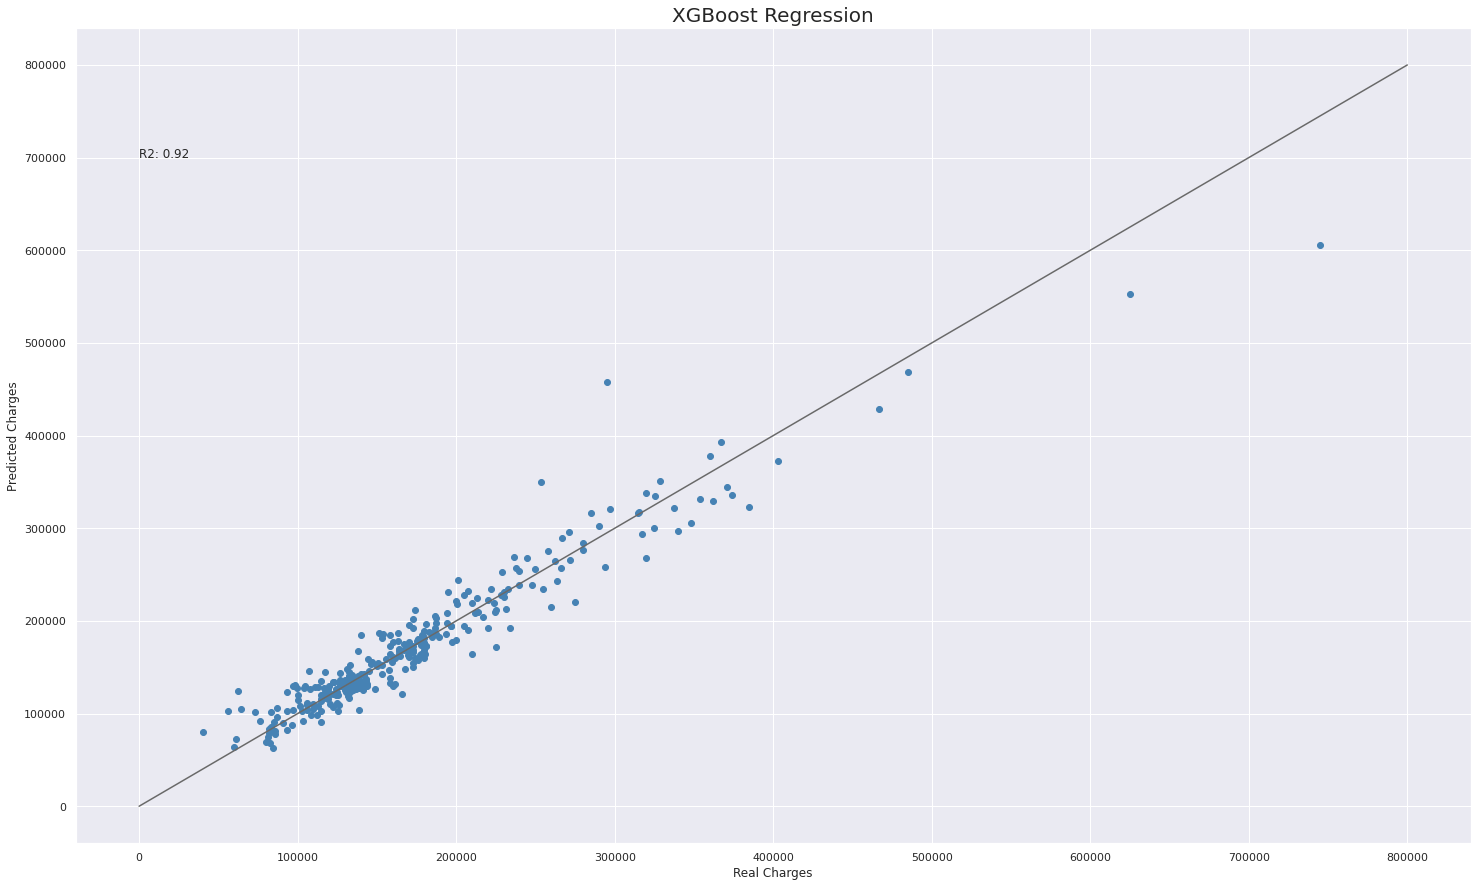

In [66]:
plt.scatter(y_test, y_pred_test_xgb, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_xgb,2)), [0,600000], [0,700000])
plt.title('XGBoost Regression', fontsize=20)
plt.show()

# Now we will build some pipelines to explore parameters and try to find which is the best performing algorithm. The parameters were found with trial and error. (This cell takes around 4h to run)

In [67]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Initiaze the hyperparameters for each dictionary
param_lr = {}
param_lr['regressor'] = [linear_reg]

param_rf = {}
param_rf['regressor__n_estimators'] = [5, 10, 50, 100]
param_rf['regressor__max_depth'] = [1, 5, 10, 20]
param_rf['regressor'] = [rf_reg]

param_kn = {}
param_kn['regressor__n_neighbors'] = [1,3,5,7,10]
param_kn['regressor__weights'] = ['uniform', 'distance']
param_kn['regressor'] = [kn_reg]

param_dt = {}
param_dt['regressor__max_depth'] = [5,10,25,None]
param_dt['regressor__min_samples_split'] = [2,5,10]
param_dt['regressor'] = [regr_dt]

param_xgb = {}
param_xgb['regressor__max_depth'] = [3,5,10,12,15]
param_xgb['regressor__eta'] = [0.1, 0.2, 0.4]
param_xgb['regressor__subsample']=[0.5, 1]
param_xgb['regressor__colsample_bytree'] = [0.3,0.5, 1]
param_xgb['regressor__num_parallel_tree'] = [1, 3,5, 7,10]
param_xgb['regressor'] = [xgb_reg]

pipeline = Pipeline([('regressor', DummyRegressor)])
params = [param_lr, param_rf, param_kn, param_dt, param_xgb]

# Train the grid search model
gs = GridSearchCV(pipeline,
                  params, 
                  cv = 5, 
                  n_jobs = 1, 
                  verbose = 0, 
                  return_train_score=True, 
                  scoring='neg_root_mean_squared_error')

best_model = gs.fit(X_train, y_train)

# See which model was the best
best_model.best_estimator_.get_params()['regressor']

KeyboardInterrupt: ignored

In [ ]:
best_model.score(X_train, y_train)

-31.118033813670436

In [ ]:
# Check the best model performance 
y_pred = best_model.predict(X_test)
rmse_bestmodel=mean_squared_error(y_test, y_pred, squared=False)
mae_bestmodel=mean_absolute_error(y_test, y_pred)
mape_bestmodel=mean_absolute_percentage_error(y_test, y_pred)
medae_bestmodel=median_absolute_error(y_test, y_pred)
r2_bestmodel=r2_score(y_test, y_pred)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_bestmodel],
    'MAE': [mae_lr, mae_kn, mae_dt ,mae_rf, mae_xgb, mae_bestmodel],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_bestmodel],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_bestmodel],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_bestmodel],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "Best Model"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31388.696213,21677.806874,0.140525,17569.467789,0.861854
KNeighborsRegressor,59952.125541,37390.484018,0.219245,23950.000000,0.496034
DecisionTreeRegressor,35808.003386,24857.561644,0.161867,17950.000000,0.820215
RandomForestRegressor,26646.200062,18132.910377,0.118094,12851.960000,0.900445
XGBoost,24197.283196,15898.453580,0.098705,10570.199219,0.917903
Best Model,30738.986410,18371.024080,0.103249,11065.273438,0.863176


Now for this best model it is going to be found which features have the most impact in the prediction task to try and see if without these unecessary features the Neural Network that is going to built increases its performance.

We can see that the best perfoming model overall is the gradient boost with default parameters, when we try to tune this model the result only gets worse because this pipeline always needs to fill every parameter given to the model.

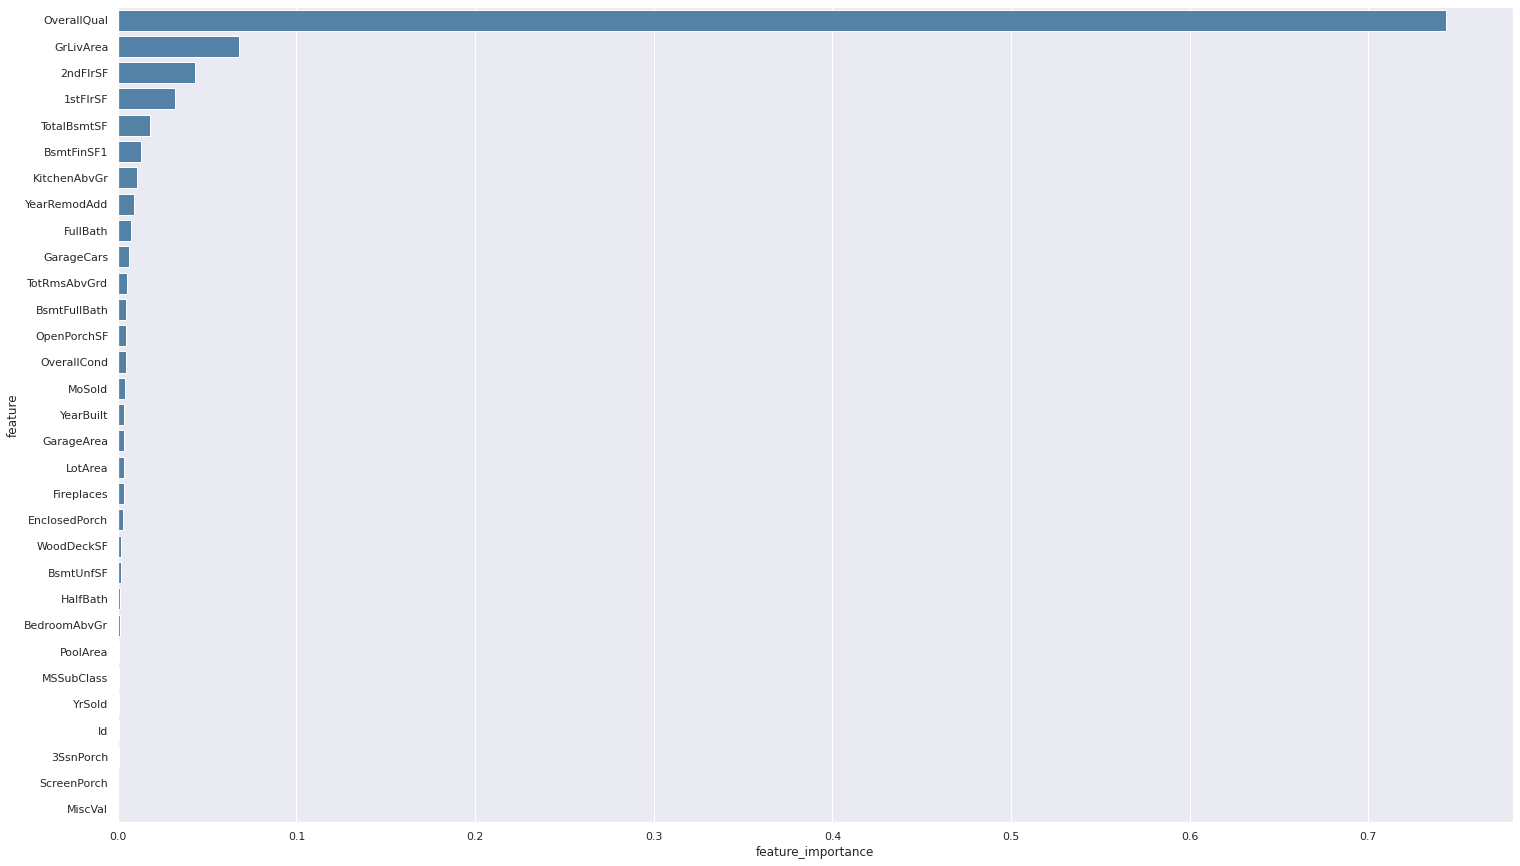

In [ ]:
data_feat = pd.DataFrame({'feature': x.columns,
                        'feature_importance': best_model.best_estimator_.named_steps['regressor'].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns_feats = sns.barplot(x='feature_importance', y='feature', data=data_feat, orient='h', color='steelblue')

# Deep Learning 

First what we are going to do is remove the features with 0 impact to the target variable seen previously and run the Neural Network and see the results. After we are going to use all variables available and see the difference in the results.

In [ ]:
!pip install shap

In [ ]:
# Removing non-core features for Deep Learning to optimize performance by reducing number of variables to weight in the algorithm

x = data.drop(['SalePrice', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'EnclosedPorch', 'BedroomAbvGr', 'YrSold', 'Id', 'HalfBath', 'KitchenAbvGr', 'BsmtUnfSF', 'MSSubClass', 'BsmtFullBath', 'Fireplaces'],axis=1)

y = data['SalePrice']

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K # To solve a current problem with SHAP library
tf.compat.v1.disable_eager_execution() # To solve a current problem with SHAP library

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

The number of hidden layers advised to use in simple regression problems like this is one, having on the second layer around half of the number of input features. Different activation functions were tested and the one that gave best results was the linear activation function only being used on the first two layers.

In [ ]:
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Input layer without the non-core features (17 out of 31)
model.add(Dense(18, activation='linear', input_shape=(17,)))

# Add one hidden layer
model.add(Dense(10, activation='linear'))

# Output layer 
model.add(Dense(1))


#The solution with higher accuracy was found for a neural network with one hidden layer with realu activation

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 18)                324       
                                                                 
 dense_28 (Dense)            (None, 10)                190       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# List all weights of the model
model.get_weights()

[array([[-0.05655304,  0.30928084, -0.32816607, -0.01975694, -0.01469317,
         -0.25029856, -0.06095502, -0.3002939 ,  0.3435577 , -0.00811484,
          0.0024181 , -0.24078937, -0.12850341, -0.05422643, -0.16750883,
          0.29248163, -0.15459299, -0.32183778],
        [-0.36126116, -0.20770445,  0.3519092 ,  0.18314984, -0.0377712 ,
          0.1257905 , -0.10540032,  0.3963326 ,  0.17699364, -0.01026335,
          0.00250626, -0.33070904,  0.28210464,  0.00470781,  0.4034275 ,
          0.03619385, -0.34889516,  0.26027557],
        [-0.10911033,  0.0588308 , -0.13931808, -0.03838134, -0.25726464,
         -0.16498548, -0.18789983,  0.11646339, -0.01795402, -0.33351117,
          0.26493546,  0.3087583 ,  0.04007718,  0.40197256,  0.12029687,
          0.07464013,  0.11424544, -0.35083678],
        [ 0.12825802, -0.10535857, -0.06426936, -0.07027417,  0.3825064 ,
          0.08837083, -0.39279762,  0.2424762 ,  0.36599383, -0.3234865 ,
         -0.32732698,  0.382579  ,  0.2

In [ ]:
# Config the model with the loss, optimizer and metric

model.compile(loss="mse",
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Train the deep learning model
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=12, batch_size=5, verbose=1, validation_data=(X_test,y_test))

Train on 10314 samples, validate on 292 samples
Epoch 1/12
10314/10314 [==============================] - 3s 269us/sample - loss: 42459420061.1146 - root_mean_squared_error: 206056.8594 - val_loss: 21208615704.5479 - val_root_mean_squared_error: 145631.7969
Epoch 2/12
  200/10314 [..............................] - ETA: 3s - loss: 22066063129.6000 - root_mean_squared_error: 148546.5000 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10314/10314 [==============================] - 3s 254us/sample - loss: 11309886104.2017 - root_mean_squared_error: 106347.9766 - val_loss: 3147998796.7123 - val_root_mean_squared_error: 56107.0273
Epoch 3/12
10314/10314 [==============================] - 3s 254us/sample - loss: 3561297576.9486 - root_mean_squared_error: 59676.6250 - val_loss: 3239028519.4521 - val_root_mean_squared_error: 56912.4648
Epoch 4/12
10314/10314 [==============================] - 3s 250us/sample - loss: 3358789643.3060 - root_mean_squared_error: 57955.0625 - val_loss: 3130541464.3288 - val_root_mean_squared_error: 55951.2422
Epoch 5/12
10314/10314 [==============================] - 3s 248us/sample - loss: 3175342799.5912 - root_mean_squared_error: 56350.1992 - val_loss: 3029593277.3699 - val_root_mean_squared_error: 55041.7383
Epoch 6/12
10314/10314 [==============================] - 3s 252us/sample - loss: 3003247219.4850 - root_mean_squared_error: 54801.9023 - val_loss: 2930918373.3699 - val_root_mean_squar

Text(0, 0.5, 'Validation Loss')

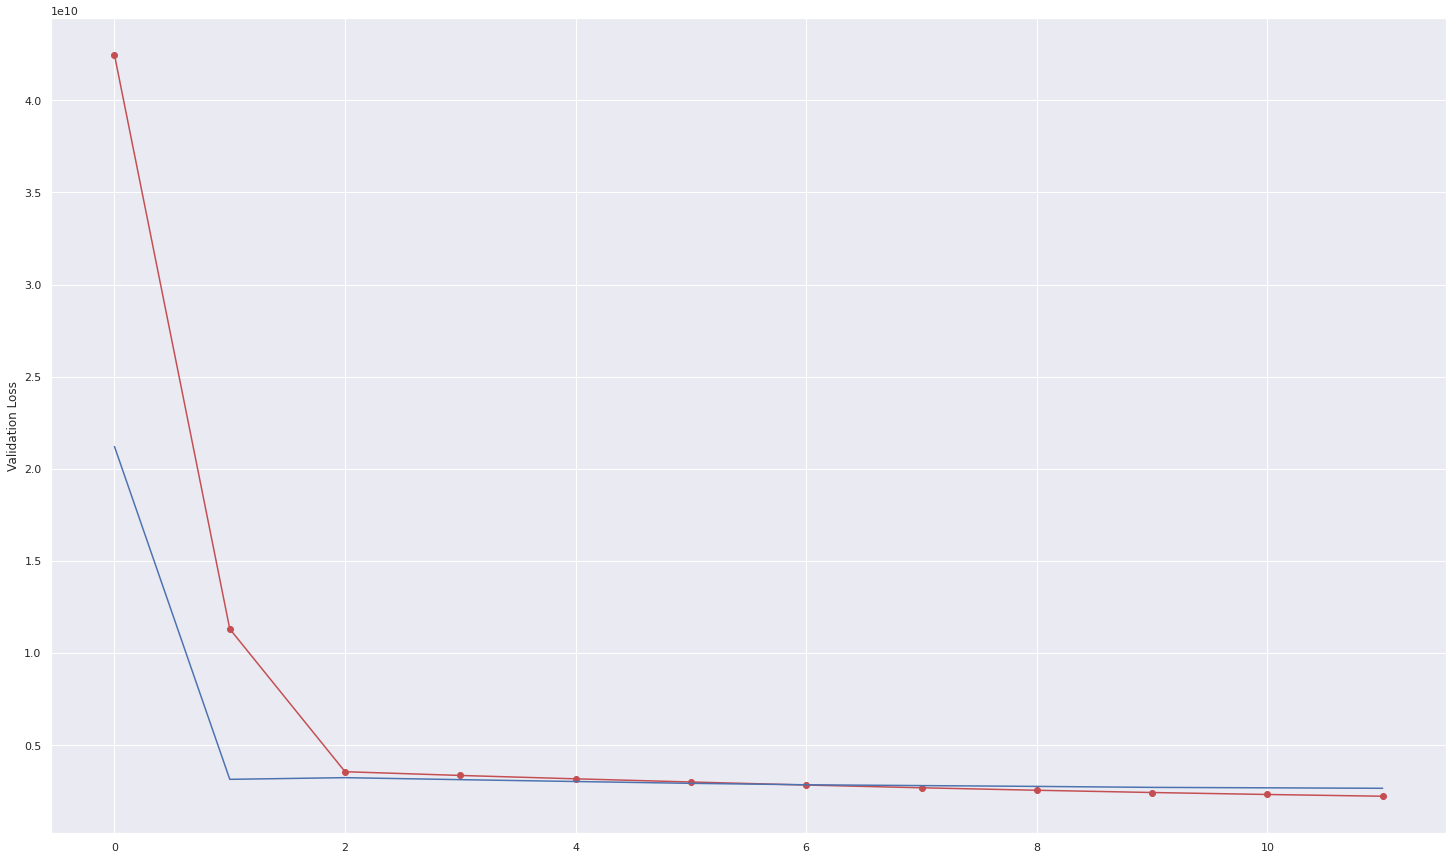

In [ ]:
#Validation loss graph

ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.plot(history.epoch, history.history["val_loss"])
ax.set_ylabel('Validation Loss')

We can see that in the first two iterations the gradient descent is rapidly minimized.

In [ ]:
# Predictions for the test set

y_pred_DL = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
# Creating the measure metrics like in the previous models

rmse_DL=mean_squared_error(y_test, y_pred_DL, squared=False)
mae_DL=mean_absolute_error(y_test, y_pred_DL)
mape_DL=mean_absolute_percentage_error(y_test, y_pred_DL)
medae_DL=median_absolute_error(y_test, y_pred_DL)
r2_DL=r2_score(y_test, y_pred_DL)

metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_DL ],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb, mae_DL],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_DL],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_DL],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_DL],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "NeuralNet"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31388.696213,21677.806874,0.140525,17569.467789,0.861854
KNeighborsRegressor,59952.125541,37390.484018,0.219245,23950.000000,0.496034
DecisionTreeRegressor,35808.003386,24857.561644,0.161867,17950.000000,0.820215
RandomForestRegressor,26646.200062,18132.910377,0.118094,12851.960000,0.900445
XGBoost,24197.283196,15898.453580,0.098705,10570.199219,0.917903
NeuralNet,51592.432869,30708.553885,0.178165,22333.972656,0.614562


We can see the that the results obtained by the **Neural Network** are not as good as the other models that we have, even applying random sampling and standardizing the values. This is because algorithms like RandomForest and XGBoost and integrated weight measures for coefficients and for cases with a low number of instances like ours (1460) it gets hard for the neural network to train and design itself in a more complex manner that allows it to fit better to data.

# Now what we are going to do is run a similar Neural Network with a few different parameters and use all the features available

In [ ]:
x = data.drop(['SalePrice'],axis=1)
  
y = data['SalePrice']

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K # To solve a current problem with SHAP library
tf.compat.v1.disable_eager_execution() # To solve a current problem with SHAP library

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

The best result achieved was obtained using the relu activation function on the two first layers and the number of neurons in the second layer was given by the same theory as before.

In [ ]:
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Input layer without the non-core features (17 out of 31)
model.add(Dense(32, activation='relu', input_shape=(31,)))

# Add one hidden layer
model.add(Dense(17, activation='relu'))

# Output layer 
model.add(Dense(1))


#The solution with higher accuracy was found for a neural network with one hidden layer with realu activation

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                1024      
                                                                 
 dense_43 (Dense)            (None, 17)                561       
                                                                 
 dense_44 (Dense)            (None, 1)                 18        
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# List all weights of the model
model.get_weights()

[array([[-9.41678137e-02,  2.14128524e-01,  9.33939219e-02,
          4.02987003e-04,  6.73743188e-02, -1.30332366e-01,
          2.75357872e-01, -4.77535427e-02,  2.21812278e-01,
         -1.21979401e-01,  1.35832816e-01,  6.14026189e-03,
          2.40744144e-01, -7.60800242e-02,  2.09737092e-01,
          2.54453629e-01, -3.17581296e-02,  2.25756675e-01,
         -1.54451758e-01, -5.53795695e-03,  6.98751509e-02,
         -2.23562360e-01, -1.50226504e-01,  2.44343370e-01,
          2.50493288e-02,  7.55908787e-02,  1.83502913e-01,
          1.24823838e-01, -1.14243820e-01, -2.97791779e-01,
         -3.06313008e-01, -7.01548904e-02],
        [-9.53107774e-02, -2.84292340e-01,  2.59644419e-01,
         -2.84707397e-01,  1.16904467e-01, -1.12443164e-01,
         -1.97102040e-01, -2.65217572e-01, -1.50678262e-01,
          2.58664399e-01,  2.40552694e-01, -9.74393040e-02,
         -2.04597533e-01, -2.95100093e-01,  5.16474247e-02,
         -2.27405176e-01, -2.16991007e-01,  1.29059196e-

In [ ]:
# Config the model with the loss, optimizer and metric
model.compile(loss="mse",
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Train the model
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=12, batch_size=5, verbose=1, validation_data=(X_test,y_test))


Train on 10314 samples, validate on 292 samples
Epoch 1/12
10314/10314 [==============================] - 3s 298us/sample - loss: 40728432875.2996 - root_mean_squared_error: 201812.8594 - val_loss: 16838803254.3562 - val_root_mean_squared_error: 129764.4219
Epoch 2/12
    5/10314 [..............................] - ETA: 12s - loss: 12026857472.0000 - root_mean_squared_error: 109667.0312

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10314/10314 [==============================] - 3s 271us/sample - loss: 8727811185.0157 - root_mean_squared_error: 93422.7891 - val_loss: 3600607850.0822 - val_root_mean_squared_error: 60005.0586
Epoch 3/12
10314/10314 [==============================] - 3s 268us/sample - loss: 4071530902.7481 - root_mean_squared_error: 63808.5820 - val_loss: 3494181674.1918 - val_root_mean_squared_error: 59111.6016
Epoch 4/12
10314/10314 [==============================] - 3s 272us/sample - loss: 3731190125.8588 - root_mean_squared_error: 61083.4727 - val_loss: 3287479399.2329 - val_root_mean_squared_error: 57336.5508
Epoch 5/12
10314/10314 [==============================] - 3s 267us/sample - loss: 3407110834.8947 - root_mean_squared_error: 58370.4453 - val_loss: 3041633415.7808 - val_root_mean_squared_error: 55151.0039
Epoch 6/12
10314/10314 [==============================] - 3s 275us/sample - loss: 3106819728.7148 - root_mean_squared_error: 55738.8477 - val_loss: 2862432842.9589 - val_root_mean_squared

Text(0, 0.5, 'Validation Loss')

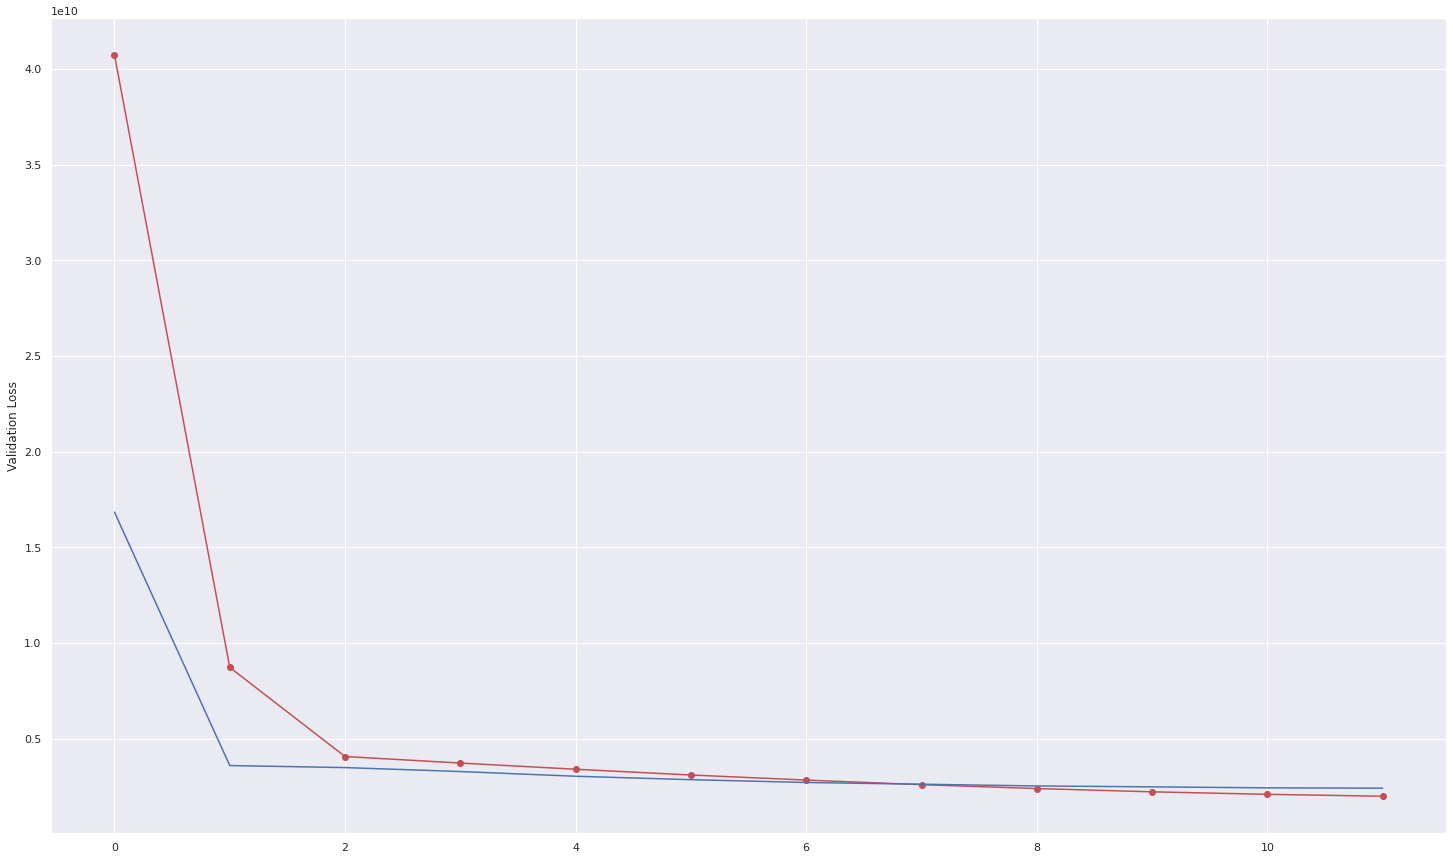

In [ ]:
# Validation loss graph

ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.plot(history.epoch, history.history["val_loss"])
ax.set_ylabel('Validation Loss')

The validation loss was rapidly minimized at the second iteration which says that the model was able to adjust well to the data

In [ ]:
# Predictions for the test set


y_pred_DL = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
#mse_bestmodel=mean_squared_error(y_test, y_pred)

rmse_DL=mean_squared_error(y_test, y_pred_DL, squared=False)
mae_DL=mean_absolute_error(y_test, y_pred_DL)
mape_DL=mean_absolute_percentage_error(y_test, y_pred_DL)
medae_DL=median_absolute_error(y_test, y_pred_DL)
r2_DL=r2_score(y_test, y_pred_DL)

#Generate a comparison table like we did previously
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_DL ],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb, mae_DL],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_DL],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_DL],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_DL],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "DL"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31388.696213,21677.806874,0.140525,17569.467789,0.861854
KNeighborsRegressor,59952.125541,37390.484018,0.219245,23950.000000,0.496034
DecisionTreeRegressor,35808.003386,24857.561644,0.161867,17950.000000,0.820215
RandomForestRegressor,26646.200062,18132.910377,0.118094,12851.960000,0.900445
XGBoost,24197.283196,15898.453580,0.098705,10570.199219,0.917903
DL,49166.192641,27348.198483,0.155289,18629.359375,0.649961


The prediction using all of the features from the data had around a 4% higher accuracy comparing with the model that doesn't use non-core features. Given this we can say that the neurons model better their weights when they have all possible given information about the data, which is something that didn't go according to our predictions.

#6-Deployment – How do stakeholders access the results?

In [ ]:
# make a prediction for an arbitraty value and see if the model works

#Conclusion